## Course Project

**Instructions:** <br>
a. In the course project, you will analyze a real-world dataset on data science jobs posted on the website Glassdoor. You will write a report on your data analysis using Jupyter Notebook. <br>
b. For each step, make sure to explain what you are doing, annotate your results, and provide your interpretation. <br>
c. When you finish, make sure to use `Kernel` -> `Restart and Run All` to restart the kernel and rerun the entire notebook to generate the desired outputs, before submitting your project report. <br>
d. Upload your .ipynb file to Canvas for grading. <br>
e. All questions related to the course project shall be posted in the Discussion section on Canvas. <br>
<br>

**Policy:** <br>
The course project is worth 25 points, counting towards 25% of the course final score. <br>

Late submission, empty submission or no submission receives 0 point. Please note that in order to pass the course, at least 30% of the total score for the project must be obtained. In case of special circumstances, email the instructor directly ahead of time. 

### Data Science Job Salary Prediction
You can download the csv files from the project folder on Canvas.  <br>

#### Context
Data of data science job posts from the website glassdoor are collected. This project aims to predict whether the salary is high or not. First, you will create a categorical variable `high_salary` based on the average salary `avg_salary`: if `avg_salary >= 150`, `high_salary = 1`; if `avg_salary < 150`, `high_salary = 0`. This new variable `high_salary` will be the prediction outcome. Of course: you cannot use other columns related to salary such as min, max, range of salary for prediction. (This is cheating!)  <br>

#### Variables:
Described in the data description file.

### Module 1: Data Exploration
Load `jobs_train.csv` and explore the dataset. How do the data look like? Are there any missing values? What do you do with missing values, i.e. removal, imputation, etc.?<br>
Are there any outliers? What do you do with outliers, i.e. drop them, explore the effects of outliers on models, etc.? <br>
Record your analysis procedures. For example, 20 observations are removed due to missingness, and 400 observations remain for further analysis. <br>

Hint: for removal of extreme outliers, consider: Q1=df.quantile(0.25); Q3=df.quantile(0.75); IQR=Q3-Q1; <br>
Remove samples that are smaller than Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR. <br>
You don't have to remove outliers if there are not any. Provide justifications if you deem not necessary.

In [1]:
import pandas as pd
df = pd.read_csv('jobs_train.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,0,Data Scientist,105-167,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
1,1,Analytics - Business Assurance Data Analyst,124-198,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,...,28,0,1,0,0,0,1,0,analyst,na
2,2,Data Scientist,91-150,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,Company - Public,...,57,1,0,0,0,1,1,0,data scientist,na
3,3,Principal Data Scientist,69-116,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,...,38,1,1,1,1,1,0,1,data scientist,senior
4,4,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,...,39,1,1,0,0,1,0,0,data scientist,na


Here we drop some columns that cannot be used for the analysis

In [2]:
df = df.drop(columns=['Salary Estimate', 'min_salary', 'max_salary', 'Unnamed: 0'])
df

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
1,Analytics - Business Assurance Data Analyst,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,...,28,0,1,0,0,0,1,0,analyst,na
2,Data Scientist,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,Company - Public,-1,-1,...,57,1,0,0,0,1,1,0,data scientist,na
3,Principal Data Scientist,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,...,38,1,1,1,1,1,0,1,data scientist,senior
4,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,...,39,1,1,0,0,1,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,AI Ops Data Scientist,"Company\n\nAstraZeneca is a global, innovation...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,107,1,0,1,1,1,0,0,data scientist,na
526,Data Scientist,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,...,35,0,0,0,0,0,0,0,data scientist,na
527,"Vice President, Biometrics and Clinical Data M...","At Alector, our mission is to develop therapie...",4.8,Alector,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,7,0,1,0,0,1,0,0,na,na
528,Data Scientist,Tokio Marine HCC is a leading specialty insura...,3.3,Tokio Marine HCC,"Houston, TX","Houston, TX",1001 to 5000 employees,Company - Private,Insurance Carriers,Insurance,...,46,1,0,0,0,0,0,0,data scientist,na


In [3]:
# checking general data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          530 non-null    object 
 1   Job Description    530 non-null    object 
 2   Rating             530 non-null    float64
 3   Company Name       530 non-null    object 
 4   Location           530 non-null    object 
 5   Headquarters       530 non-null    object 
 6   Size               530 non-null    object 
 7   Type of ownership  530 non-null    object 
 8   Industry           530 non-null    object 
 9   Sector             530 non-null    object 
 10  Revenue            530 non-null    object 
 11  avg_salary         530 non-null    int64  
 12  job_state          530 non-null    object 
 13  same_state         530 non-null    int64  
 14  company_age        530 non-null    int64  
 15  python             530 non-null    int64  
 16  excel              530 non

After we check the data specifically, there are some missing values in form of '-1' and 'Unknown'. Let's explore the detail!

**Size**

In [4]:
size = df[df['Size'] == '-1']
size

#When we have missing values in Size column, the other column such as Headquarters, Type of ownership, Industry, Sector, and Company Age are also empty
#We cannot estimate the value. Therefore we will drop the missing values

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
65,Data Scientist,Job Description\nBecome a thought leader withi...,0.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,0,0,0,0,0,0,0,data scientist,na
87,Data Scientist,Join a thriving company that is changing the w...,0.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,...,-1,1,1,1,0,0,1,0,data scientist,na
113,Data Scientist,"Job Description\nAs a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,1,0,1,0,1,0,data scientist,na
115,Data Scientist,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,0,0,1,1,0,0,data scientist,na
174,Machine Learning Engineer,Overview\n\nRadical Convergence is a fast-pace...,0.0,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,mle,na
185,Data Scientist,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,0,0,1,1,0,0,data scientist,na
254,Data Scientist,"Overview\n\nGood people, working with good peo...",0.0,Kehe Food Distributors,"Naperville, IL",-1,-1,-1,-1,-1,...,-1,1,1,1,1,1,1,1,data scientist,na
331,Data Scientist,DESCRIPTION\n\nGrainBridge is seeking a talent...,0.0,"GrainBridge, LLC","Omaha, NE",-1,-1,-1,-1,-1,...,-1,1,1,0,0,1,0,1,data scientist,na
339,Data Scientist,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,0,0,1,1,0,0,data scientist,na


**Type of ownership**

In [5]:
type_owner = df[(df['Type of ownership'] == '-1') | (df['Type of ownership'] == 'Unknown')]
type_owner

#When we have missing values in Type of ownership column, majority of other column such as Headquarters, Size, Industry, Sector, and Company Age are also empty
#We cannot estimate the value. Therefore we will drop the missing values

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
65,Data Scientist,Job Description\nBecome a thought leader withi...,0.0,JKGT,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,0,0,0,0,0,0,0,data scientist,na
87,Data Scientist,Join a thriving company that is changing the w...,0.0,AccessHope,"Irwindale, CA",-1,-1,-1,-1,-1,...,-1,1,1,1,0,0,1,0,data scientist,na
113,Data Scientist,"Job Description\nAs a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,1,0,1,0,1,0,data scientist,na
115,Data Scientist,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,0,0,1,1,0,0,data scientist,na
118,Data Scientist,About Navio:\nNavio builds software tools that...,0.0,Navio,"San Mateo, CA","Half Moon Bay, CA",Unknown,Unknown,-1,-1,...,-1,0,0,0,0,1,0,0,data scientist,na
174,Machine Learning Engineer,Overview\n\nRadical Convergence is a fast-pace...,0.0,Radical Convergence,"Reston, VA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,mle,na
185,Data Scientist,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,0,0,1,1,0,0,data scientist,na
254,Data Scientist,"Overview\n\nGood people, working with good peo...",0.0,Kehe Food Distributors,"Naperville, IL",-1,-1,-1,-1,-1,...,-1,1,1,1,1,1,1,1,data scientist,na
297,Data Scientist,Job Description\nWorking at Sophinea\n\nSophin...,0.0,Sophinea,"Chantilly, VA",-1,1 to 50 employees,Unknown,-1,-1,...,-1,0,0,0,0,0,0,0,data scientist,na


**Revenue**

In [6]:
reven = df[(df['Revenue'] == '-1') | (df['Revenue'] == 'Unknown / Non-Applicable')]
reven

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
12,Data Scientist,CompuForce is seeking an experienced and highl...,0.0,CompuForce,"New York, NY","New York, NY",Unknown,Company - Private,-1,-1,...,-1,0,1,1,1,1,0,1,data scientist,na
14,Staff BI and Data Engineer,Job Description: Staff BI and Data Engineer\nL...,2.9,Affinity Solutions,"San Jose, CA","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,...,22,1,0,0,1,0,1,1,data engineer,na
16,Data Scientist,Job Description\nClear Ridge has an exciting o...,0.0,Clear Ridge Defense,"Quantico, VA","Baltimore, MD",1 to 50 employees,Company - Private,-1,-1,...,-1,1,0,1,0,0,0,0,data scientist,na
20,Data Science Software Engineer,We love programming and the excitement that co...,4.8,Klaviyo,"Boston, MA","Boston, MA",201 to 500 employees,Company - Private,Computer Hardware & Software,Information Technology,...,8,1,0,0,0,0,0,0,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,Real World Evidence (RWE) Scientist,Genesis Research is an international healthcar...,5.0,Genesis Research,"Hoboken, NJ","Hoboken, NJ",1 to 50 employees,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,11,1,0,0,0,0,0,0,na,na
522,Data Scientist,"Job Description\nAs a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,1,0,1,0,1,0,data scientist,na
523,Medical Lab Scientist,Responsibilities\n\n\nThe Medical Laboratory S...,3.5,Tower Health,"West Grove, PA","Reading, PA",5001 to 10000 employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,...,3,0,0,0,0,0,0,0,na,na
527,"Vice President, Biometrics and Clinical Data M...","At Alector, our mission is to develop therapie...",4.8,Alector,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,7,0,1,0,0,1,0,0,na,na


**Company Age**

In [7]:
age_comp = df[(df['company_age'] == -1)]
age_comp

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
6,Data Scientist,A strong candidate must demonstrate the abilit...,4.1,"Latitude, Inc.","Washington, DC","Hanover, MD",1 to 50 employees,Company - Private,Consulting,Business Services,...,-1,1,0,0,0,0,1,0,data scientist,na
10,Data Scientist,Job Description\nWe are looking for the sharpe...,5.0,PeopleCom,"McLean, VA","Reston, VA",1 to 50 employees,Company - Private,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
12,Data Scientist,CompuForce is seeking an experienced and highl...,0.0,CompuForce,"New York, NY","New York, NY",Unknown,Company - Private,-1,-1,...,-1,0,1,1,1,1,0,1,data scientist,na
16,Data Scientist,Job Description\nClear Ridge has an exciting o...,0.0,Clear Ridge Defense,"Quantico, VA","Baltimore, MD",1 to 50 employees,Company - Private,-1,-1,...,-1,1,0,1,0,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,Data Scientist,Title Data Scientist Location Remote Duration ...,0.0,"Blue Icy Water, LLC",United States,"Livonia, MI",1 to 50 employees,Company - Private,-1,-1,...,-1,0,1,0,0,0,0,0,data scientist,na
514,Data Scientist,"About Joby\nLocated in Northern California, th...",4.3,Joby Aviation,"San Carlos, CA","Santa Cruz, CA",51 to 200 employees,Company - Private,-1,-1,...,-1,1,1,0,1,1,0,1,data scientist,na
516,Data Scientist,Job Overview: The Data Scientist is a key memb...,0.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,0,0,1,1,0,0,data scientist,na
522,Data Scientist,"Job Description\nAs a Data Scientist, you will...",0.0,HireAi,"San Francisco, CA",-1,-1,-1,-1,-1,...,-1,1,1,0,1,0,1,0,data scientist,na


**Job Simp**

In [8]:
job_simp_data = df[(df['job_simp'] != 'na')]
job_simp_data
#The job title can help us fill the missing values for job_simp

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
1,Analytics - Business Assurance Data Analyst,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,...,28,0,1,0,0,0,1,0,analyst,na
2,Data Scientist,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,Company - Public,-1,-1,...,57,1,0,0,0,1,1,0,data scientist,na
3,Principal Data Scientist,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,...,38,1,1,1,1,1,0,1,data scientist,senior
4,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,...,39,1,1,0,0,1,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,Data Scientist,Title: Data Scientist\n\nLocation: Springfield...,5.0,Royce Geospatial,"Springfield, VA","Arlington, VA",51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,...,6,1,0,0,0,0,0,1,data scientist,na
525,AI Ops Data Scientist,"Company\n\nAstraZeneca is a global, innovation...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,107,1,0,1,1,1,0,0,data scientist,na
526,Data Scientist,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,...,35,0,0,0,0,0,0,0,data scientist,na
528,Data Scientist,Tokio Marine HCC is a leading specialty insura...,3.3,Tokio Marine HCC,"Houston, TX","Houston, TX",1001 to 5000 employees,Company - Private,Insurance Carriers,Insurance,...,46,1,0,0,0,0,0,0,data scientist,na


**Seniority**

In [9]:
seniority = df[df['seniority'] == 'na']
seniority

#264 data have na value -> almost half of the data!

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Data Scientist,"Location: Redmond, WA\nClient: Microsoft (Un-M...",0.0,Pactera Edge,"Redmond, WA",-1,-1,-1,-1,-1,...,-1,1,0,0,0,0,0,0,data scientist,na
1,Analytics - Business Assurance Data Analyst,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,...,28,0,1,0,0,0,1,0,analyst,na
2,Data Scientist,Business Unit: Data Scientist Comcast brings t...,3.5,Comcast,"New York, NY","Philadelphia, PA",10000+ employees,Company - Public,-1,-1,...,57,1,0,0,0,1,1,0,data scientist,na
4,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,...,39,1,1,0,0,1,0,0,data scientist,na
5,"Data Scientist, Kinship - NYC/Portland",Back to search results\nPrevious job\n\nNext j...,3.9,Mars,"New York, NY","Mc Lean, VA",10000+ employees,Company - Private,Food & Beverage Manufacturing,Manufacturing,...,109,1,0,0,1,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,AI Ops Data Scientist,"Company\n\nAstraZeneca is a global, innovation...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,107,1,0,1,1,1,0,0,data scientist,na
526,Data Scientist,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,...,35,0,0,0,0,0,0,0,data scientist,na
527,"Vice President, Biometrics and Clinical Data M...","At Alector, our mission is to develop therapie...",4.8,Alector,"South San Francisco, CA","South San Francisco, CA",51 to 200 employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,7,0,1,0,0,1,0,0,na,na
528,Data Scientist,Tokio Marine HCC is a leading specialty insura...,3.3,Tokio Marine HCC,"Houston, TX","Houston, TX",1001 to 5000 employees,Company - Private,Insurance Carriers,Insurance,...,46,1,0,0,0,0,0,0,data scientist,na


We will manage all of the missing values with removal and imputation.
1. Generally, we drop data without info, such as **headquarters, industry, and sector**. We will drop everything because we cannot estimate anything to fill the missing values.
2. We will drop the data if the **size** has no info.
3. We drop the data if the **type of ownership** has no info.
4. If the **revenue** has missing values, we fill it based on the mode value filter by size, type of ownership, industry, and sector. If there is no data with the same pattern, we drop it.
5. If we have missing values in **company age**, we fill it based on the mean value filter by size, type of ownership, industry, and sector. If there is no data with the same pattern, we drop it.
6. If we have missing values in **job_simp**, we can check the job title (if there's a manager keyword, change to manager; elif director, transition to director; elif machine learning keyword, change to mle; elif science keyword, change to data science; elif analyst; elif engineer; elif drop the data)
7. **Seniority** -> As na fills almost half of this column, don't replace na

We filter some columns for the revenue and company age because we suspect all of those columns that we choose potentially have a high correlation with revenue and company age, thus helping us get the value close to the real one.

In [10]:
# df2 = df[(df['Rating'] == 0.0)&df['Type of ownership']!= '-1']
# mode_too = df2['Type of ownership'].mode()[0]

drop_row = []

for i in df.index:
    if (df.loc[i, 'Headquarters']== '-1'):
        drop_row.append(i)
        
    if (df.loc[i,'Size']=='-1' or df.loc[i,'Size']=='Unknown'):
        drop_row.append(i)
        
    if ((df.loc[i, 'Rating']==0.0) & (df.loc[i, 'Type of ownership']=='-1' or df.loc[i, 'Type of ownership']=='Unknown')):
         drop_row.append(i)
        
    if (df.loc[i, 'Industry']=='-1'):
        drop_row.append(i)
        
    if (df.loc[i, 'Sector']=='-1'):
        drop_row.append(i)
            
    if (df.loc[i, 'Revenue'] == '-1') or ('unknown' in df.loc[i, 'Revenue'].lower()):
        mean = df[(df['Size'] == df.loc[i, 'Size']) & (df['Type of ownership'] == df.loc[i, 'Type of ownership']) & (df['Industry'] == df.loc[i, 'Industry']) & (df['Sector'] == df.loc[i, 'Sector'])]
        if(mean['Revenue']!='-1').any() and ('unknown' not in df.loc[i, 'Revenue'].lower()):
            df.loc[i, 'Revenue'] = mean['Revenue'].mode()[0]
        else: drop_row.append(i)
            
    if (df.loc[i, 'company_age'] == -1):
        mean = df[(df['Size'] == df.loc[i, 'Size']) & (df['Type of ownership'] == df.loc[i, 'Type of ownership']) & (df['Industry'] == df.loc[i, 'Industry']) & (df['Sector'] == df.loc[i, 'Sector'])]
        if(mean['company_age']!=-1).any():
            df.loc[i, 'company_age'] = mean['company_age'].mean().round().astype(int)
        else: drop_row.append(i)
    
    if (df.loc[i, 'job_simp']=='na'):
        if 'manager' in df.loc[i, 'Job Title'].lower():
            df.loc[i, 'job_simp'] = "manager"
        elif 'director' in df.loc[i, 'Job Title'].lower():
            df.loc[i, 'job_simp'] = "director"
        elif 'machine' in df.loc[i, 'Job Title'].lower():
            df.loc[i, 'job_simp'] = "mle"
        elif 'deep' in df.loc[i, 'Job Title'].lower():
                    df.loc[i, 'job_simp'] = "mle"
        elif 'engineer' in df.loc[i, 'Job Title'].lower():
            df.loc[i, 'job_simp'] = "data engineer"
        elif 'science' in df.loc[i, 'Job Title'].lower() or 'scient' in df.loc[i, 'Job Title'].lower():
            df.loc[i, 'job_simp'] = "data scientist"
        elif 'analy' in df.loc[i, 'Job Title'].lower():
            df.loc[i, 'job_simp'] = "analyst"
        else: drop_row.append(i)
        
df = df.drop(drop_row, axis=0)       
df

,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
1,Analytics - Business Assurance Data Analyst,Analytics - Business Assurance Data Analyst (C...,4.6,GreatAmerica Financial Services,"Cedar Rapids, IA","Cedar Rapids, IA",501 to 1000 employees,Company - Private,Lending,Finance,...,28,0,1,0,0,0,1,0,analyst,na
3,Principal Data Scientist,Job Requisition ID #\n20WD40121\nJob Title\nPr...,4.0,Autodesk,"San Francisco, CA","San Rafael, CA",5001 to 10000 employees,Company - Public,Computer Hardware & Software,Information Technology,...,38,1,1,1,1,1,0,1,data scientist,senior
4,Data Scientist,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,...,39,1,1,0,0,1,0,0,data scientist,na
5,"Data Scientist, Kinship - NYC/Portland",Back to search results\nPrevious job\n\nNext j...,3.9,Mars,"New York, NY","Mc Lean, VA",10000+ employees,Company - Private,Food & Beverage Manufacturing,Manufacturing,...,109,1,0,0,1,0,0,0,data scientist,na
6,Data Scientist,A strong candidate must demonstrate the abilit...,4.1,"Latitude, Inc.","Washington, DC","Hanover, MD",1 to 50 employees,Company - Private,Consulting,Business Services,...,3,1,0,0,0,0,1,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,"Machine Learning Engineer, Sr.","Machine Learning Engineer, Sr.\nLocation\n\n\n...",4.2,AeroVironment,"Simi Valley, CA","Simi Valley, CA",501 to 1000 employees,Company - Public,Aerospace & Defense,Aerospace & Defense,...,49,1,1,0,0,1,0,1,mle,senior
524,Data Scientist,Title: Data Scientist\n\nLocation: Springfield...,5.0,Royce Geospatial,"Springfield, VA","Arlington, VA",51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,...,6,1,0,0,0,0,0,1,data scientist,na
525,AI Ops Data Scientist,"Company\n\nAstraZeneca is a global, innovation...",4.0,AstraZeneca,"Gaithersburg, MD","Cambridge, United Kingdom",10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,...,107,1,0,1,1,1,0,0,data scientist,na
526,Data Scientist,"Data Scientist (Fairfax, VA)\n\nDo you want to...",3.4,Trident Systems Inc,"Fairfax, VA","Fairfax, VA",51 to 200 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,...,35,0,0,0,0,0,0,0,data scientist,na


Here, we check if missing values are in the data after we do removal and imputation.

In [11]:
check=[]
for i in df.index:
    if (df.loc[i, 'Headquarters']== '-1'):
        check.append(i)
        
    if ((df.loc[i,'Size']=='-1') or df.loc[i,'Size']=='Unknown'):
        check.append(i)
        
    if (df.loc[i, 'Type of ownership']=='-1' or df.loc[i, 'Type of ownership']=='Unknown'):
         check.append(i)
        
    if (df.loc[i, 'Industry']=='-1'):
        check.append(i)
        
    if (df.loc[i, 'Sector']=='-1'):
        check.append(i)
        
    if (df.loc[i, 'job_simp']=='na'):
        check.append(i)
            
    if (df.loc[i, 'Revenue'] == '-1') or (df.loc[i, 'Revenue'] == 'Unknown / Non-Applicable'):
        check.append(i)

    if (df.loc[i, 'company_age'] == -1):
        check.append(i)
        
print(check)

[]


Let's check the outlier!

In [12]:
# checking outlier
Q1=df['avg_salary'].quantile(0.25)
Q3=df['avg_salary'].quantile(0.75) 
IQR=Q3-Q1
IQR

37.0

In [13]:
# info lower outliers 
df_filter1 = df.loc[df['avg_salary'] < (Q1 - 2.5 * IQR)]
df_filter1.shape
# no lower outliers

(0, 24)

In [14]:
# info higher outliers 
df_filter2 = df.loc[df['avg_salary'] > (Q3 + 2.5 * IQR)]
df_filter2.shape

(10, 24)

In [15]:
#drop outliers
ind_name1 = df[df['avg_salary'] < (Q1 - 2.5 * IQR)].index 
df.drop(ind_name1, inplace = True) 
ind_name2 = df[df['avg_salary'] > (Q3 + 2.5 * IQR)].index 
df.drop(ind_name2, inplace = True) 
df.shape

(309, 24)

211 data are removed due to missing values, 10 outliers are removed from the observation, and 309 observations remain for further analysis.

**Let's update our test data here!**

In [16]:
df_test = pd.read_csv('jobs_test.csv')
df_test = df_test.drop(columns=['Salary Estimate', 'min_salary', 'max_salary', 'Unnamed: 0'])
drop_row_test = []

for i in df_test.index:
    if (df_test.loc[i, 'Headquarters']== '-1'):
        drop_row_test.append(i)
        
    if (df_test.loc[i,'Size']=='-1' or df_test.loc[i,'Size']=='Unknown'):
        drop_row_test.append(i)
        
    if ((df_test.loc[i, 'Rating']==0.0) & (df_test.loc[i, 'Type of ownership']=='-1' or df_test.loc[i, 'Type of ownership']=='Unknown')):
         drop_row_test.append(i)
        
    if (df_test.loc[i, 'Industry']=='-1'):
        drop_row_test.append(i)
        
    if (df_test.loc[i, 'Sector']=='-1'):
        drop_row_test.append(i)
            
    if (df_test.loc[i, 'Revenue'] == '-1') or ('unknown' in df_test.loc[i, 'Revenue'].lower()):
        mean_test = df_test[(df_test['Size'] == df_test.loc[i, 'Size']) & (df_test['Type of ownership'] == df_test.loc[i, 'Type of ownership']) & (df_test['Industry'] == df_test.loc[i, 'Industry']) & (df_test['Sector'] == df_test.loc[i, 'Sector'])]
        if(mean_test['Revenue']!='-1').any() and ('unknown' not in df_test.loc[i, 'Revenue'].lower()):
            df_test.loc[i, 'Revenue'] = mean_test['Revenue'].mode()[0]
        else: drop_row_test.append(i)
            
    if (df_test.loc[i, 'company_age'] == -1):
        mean_test = df_test[(df_test['Size'] == df_test.loc[i, 'Size']) & (df_test['Type of ownership'] == df_test.loc[i, 'Type of ownership']) & (df_test['Industry'] == df_test.loc[i, 'Industry']) & (df_test['Sector'] == df_test.loc[i, 'Sector'])]
        if(mean_test['company_age']!=-1).any():
            df_test.loc[i, 'company_age'] = mean_test['company_age'].mean().round().astype(int)
        else: drop_row_test.append(i)
    
    if (df_test.loc[i, 'job_simp']=='na'):
        if 'manager' in df_test.loc[i, 'Job Title'].lower():
            df_test.loc[i, 'job_simp'] = "manager"
        elif 'director' in df_test.loc[i, 'Job Title'].lower():
            df_test.loc[i, 'job_simp'] = "director"
        elif 'machine' in df_test.loc[i, 'Job Title'].lower():
            df_test.loc[i, 'job_simp'] = "mle"
        elif 'deep' in df_test.loc[i, 'Job Title'].lower():
                    df_test.loc[i, 'job_simp'] = "mle"
        elif 'engineer' in df_test.loc[i, 'Job Title'].lower():
            df_test.loc[i, 'job_simp'] = "data engineer"
        elif 'science' in df_test.loc[i, 'Job Title'].lower() or 'scient' in df_test.loc[i, 'Job Title'].lower():
            df_test.loc[i, 'job_simp'] = "data scientist"
        elif 'analy' in df_test.loc[i, 'Job Title'].lower():
            df_test.loc[i, 'job_simp'] = "analyst"
        else: drop_row_test.append(i)
    
    if (df_test.loc[i, 'seniority']=='jr'):
        drop_row_test.append(i)
        
df_test = df_test.drop(drop_row_test, axis=0)       

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the high-salary group versus the low-salary group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important. For variables with similar patterns, you may state in your findings that variables a, b, c have similar patterns.

Here we add high salary column (based on average salary>=150) and update the index

In [17]:
import numpy as np

df['high_salary'] = np.where(df['avg_salary'] >= 150, 1, 0)
df_test['high_salary'] = np.where(df_test['avg_salary'] >= 150, 1, 0)
df_test = df_test.reset_index()
df = df.reset_index()
# df

For the plot, several columns are dropped because the value for each data is unique. Thus, the plot will be too noisy and not informative to be seen visually.

In [18]:
exclude_column = ['Job Title', 'Job Description', 'Company Name', 'Location', 'Headquarters']
X = df.drop(exclude_column, axis=1)
X = X.reset_index()
# X.head(5)

## 1. Histogram plot for each features

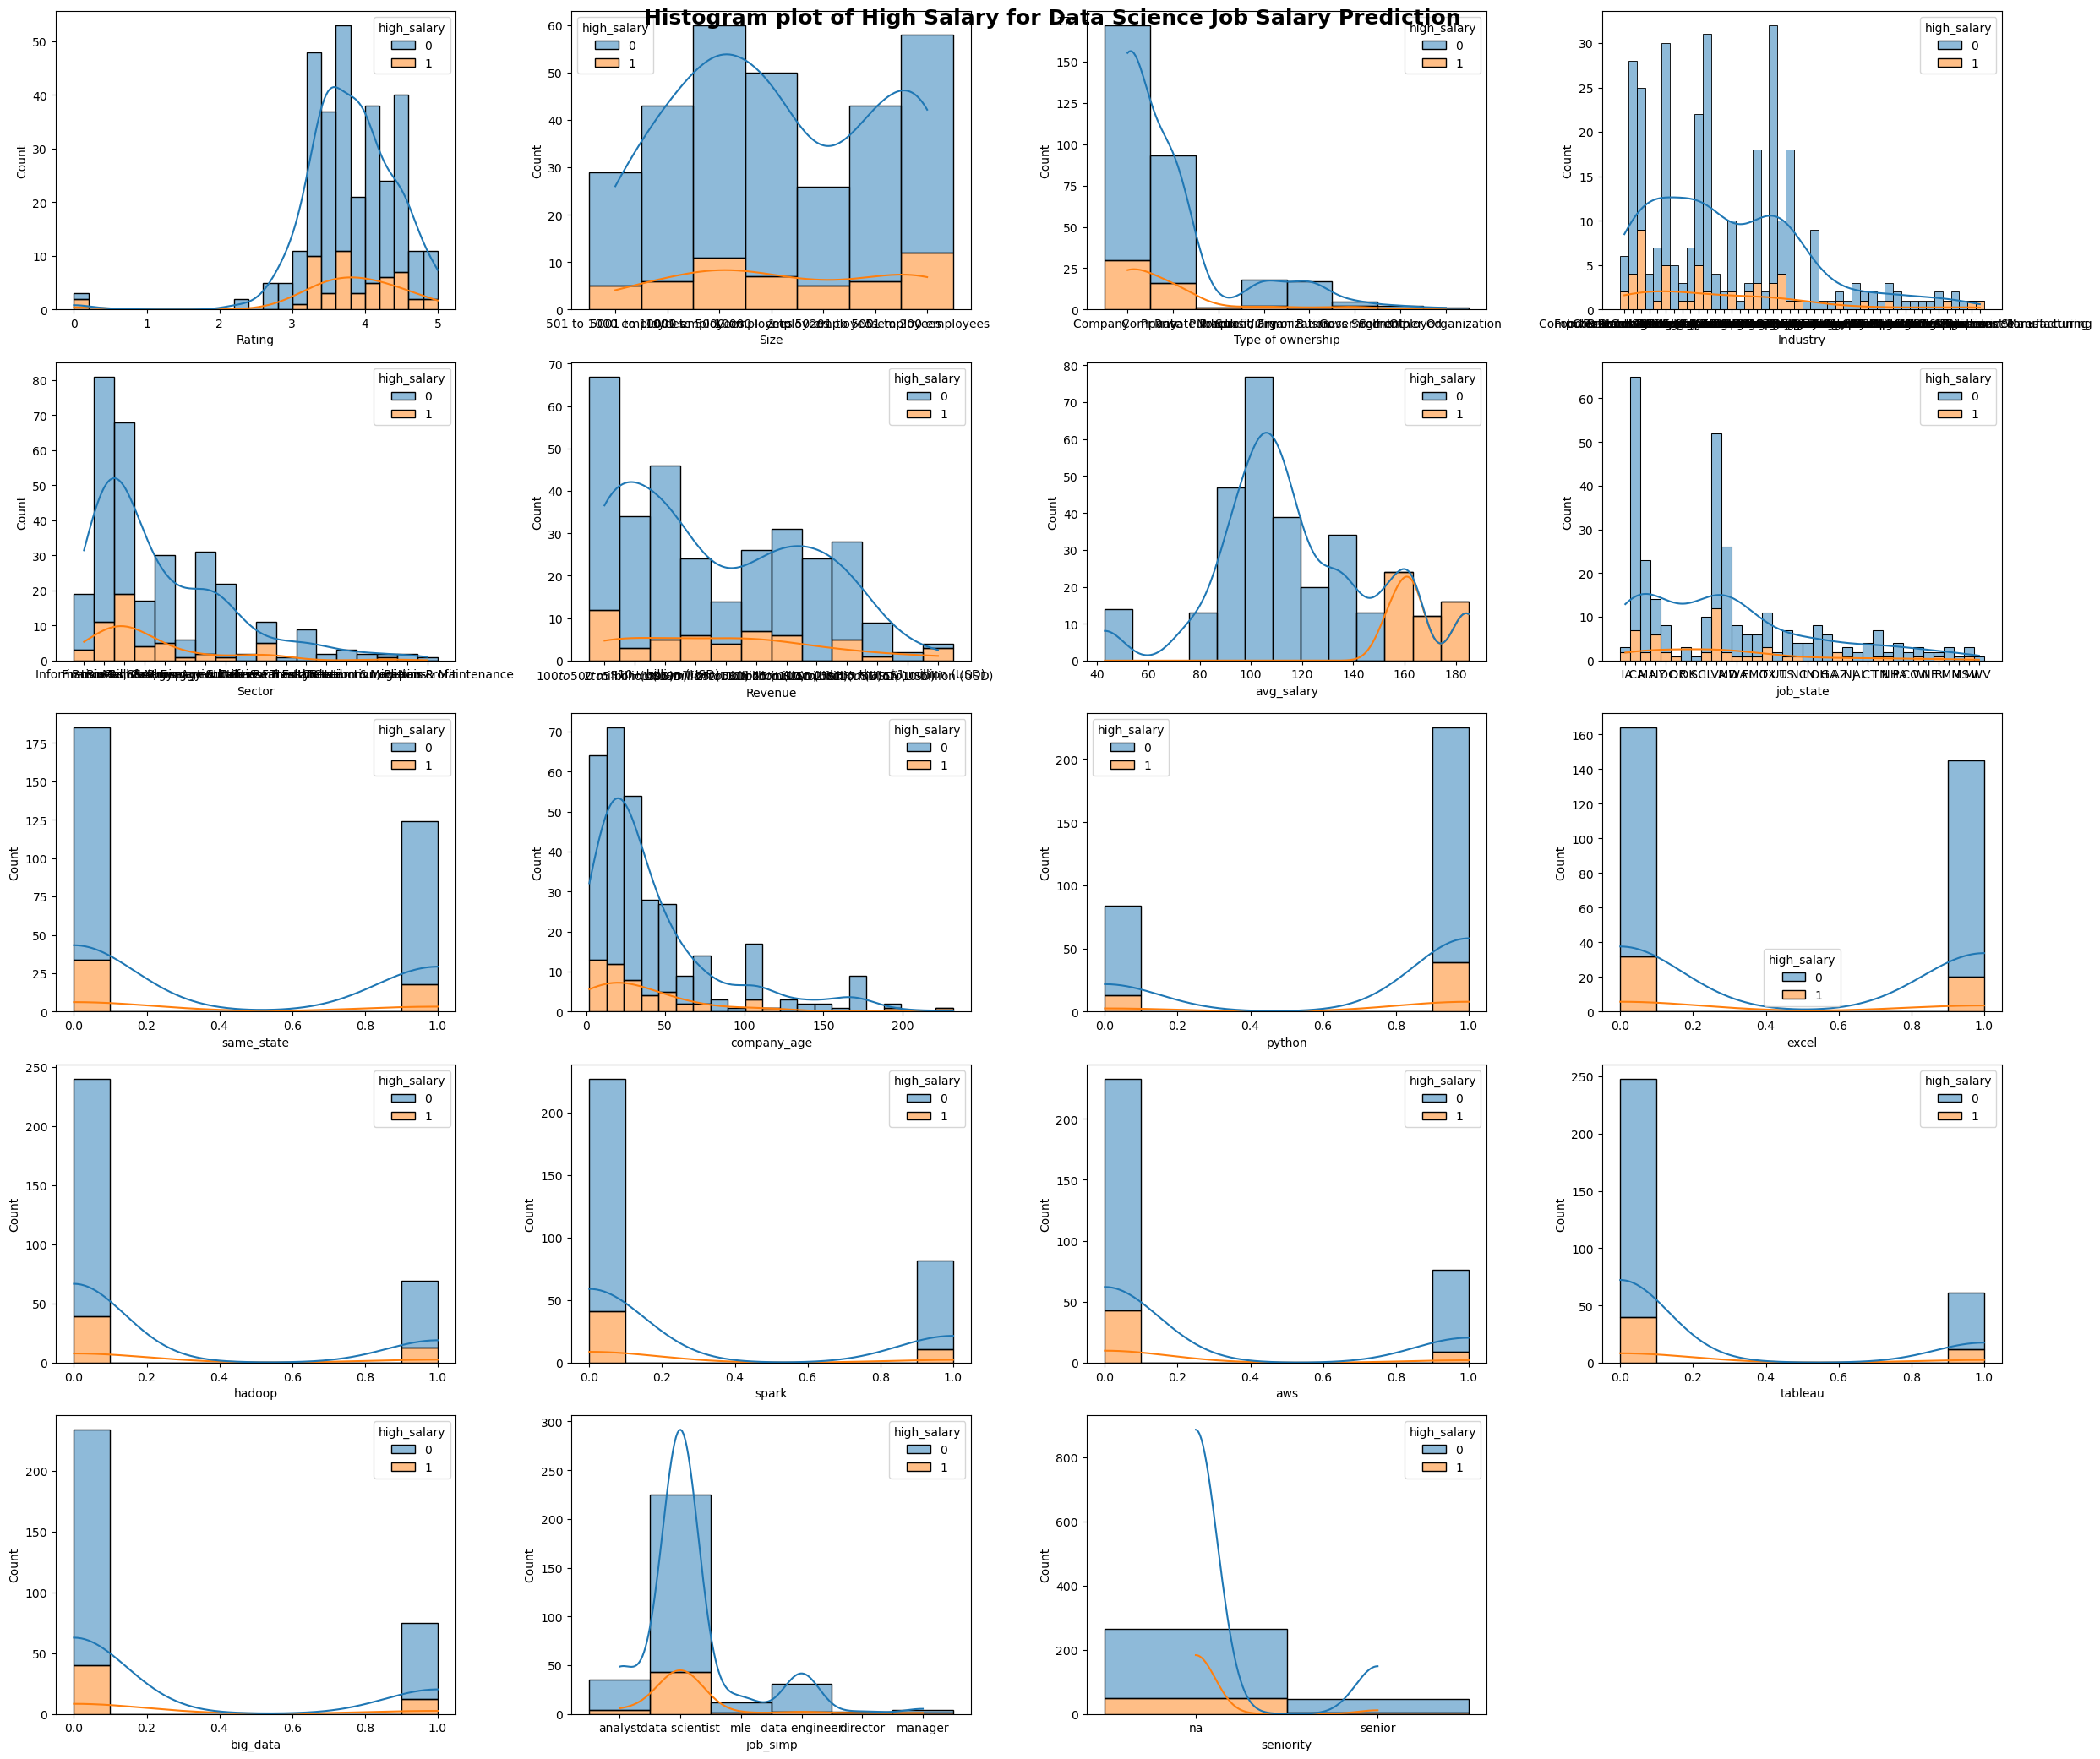

In [19]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

i = 1

plt.figure(figsize=(25, 25))

for p in X:
    if p != 'high_salary' and p != 'index' and p != 'level_0':
        plt.subplot(6, 4, i)
        sns.histplot(data=X, x=p, hue='high_salary', palette='tab10', multiple='stack', kde=True)
        i += 1

plt.suptitle('Histogram plot of High Salary for Data Science Job Salary Prediction', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

Based on the plot above, we can conclude that:
1. Generally, histogram plot above shows informative range of high_salary for numerical and some categorical columns. All of them shows that majority of jobs have low salary range. 
2. Categorical columns with title size, type of ownership, industry, sector, revenue, and job_state have too much unique value. Thus, we will process and represent it in different plot.
3. In rating plot, high and low salary are right skewed toward the higher rating. On the other hand, high and low salary in company_age plot are skewed toward the new company (left skewed).
4. Other categorical columns same_state, python, excel, hadoop, spark, aws, tableau, and big data only have 2 unique value Yes (1) and No (0). We could only take the count range for each column from the plot

**Let's categorize our column before plotting the other graph!**

In [20]:
df = df.drop('index', axis=1)
# df.dtypes 

In [21]:
categorical_column = []
numerical_column = []

exclude_column_num = ['same_state', 'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data']

for i in list(df):
    if i != 'high_salary':
        if df[i].dtypes == 'object':
            categorical_column.append(i)
        elif i in exclude_column_num:
            categorical_column.append(i)
        elif df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
            if(i!='high_salary'): 
                numerical_column.append(i)
            
print("Numerical column = ", numerical_column, "with size ", len(numerical_column))
print("Categorical column = ", categorical_column, "with size ", len(categorical_column))

Numerical column =  ['Rating', 'avg_salary', 'company_age'] with size  3
Categorical column =  ['Job Title', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'same_state', 'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp', 'seniority'] with size  21


## 2. Numerical Boxplot

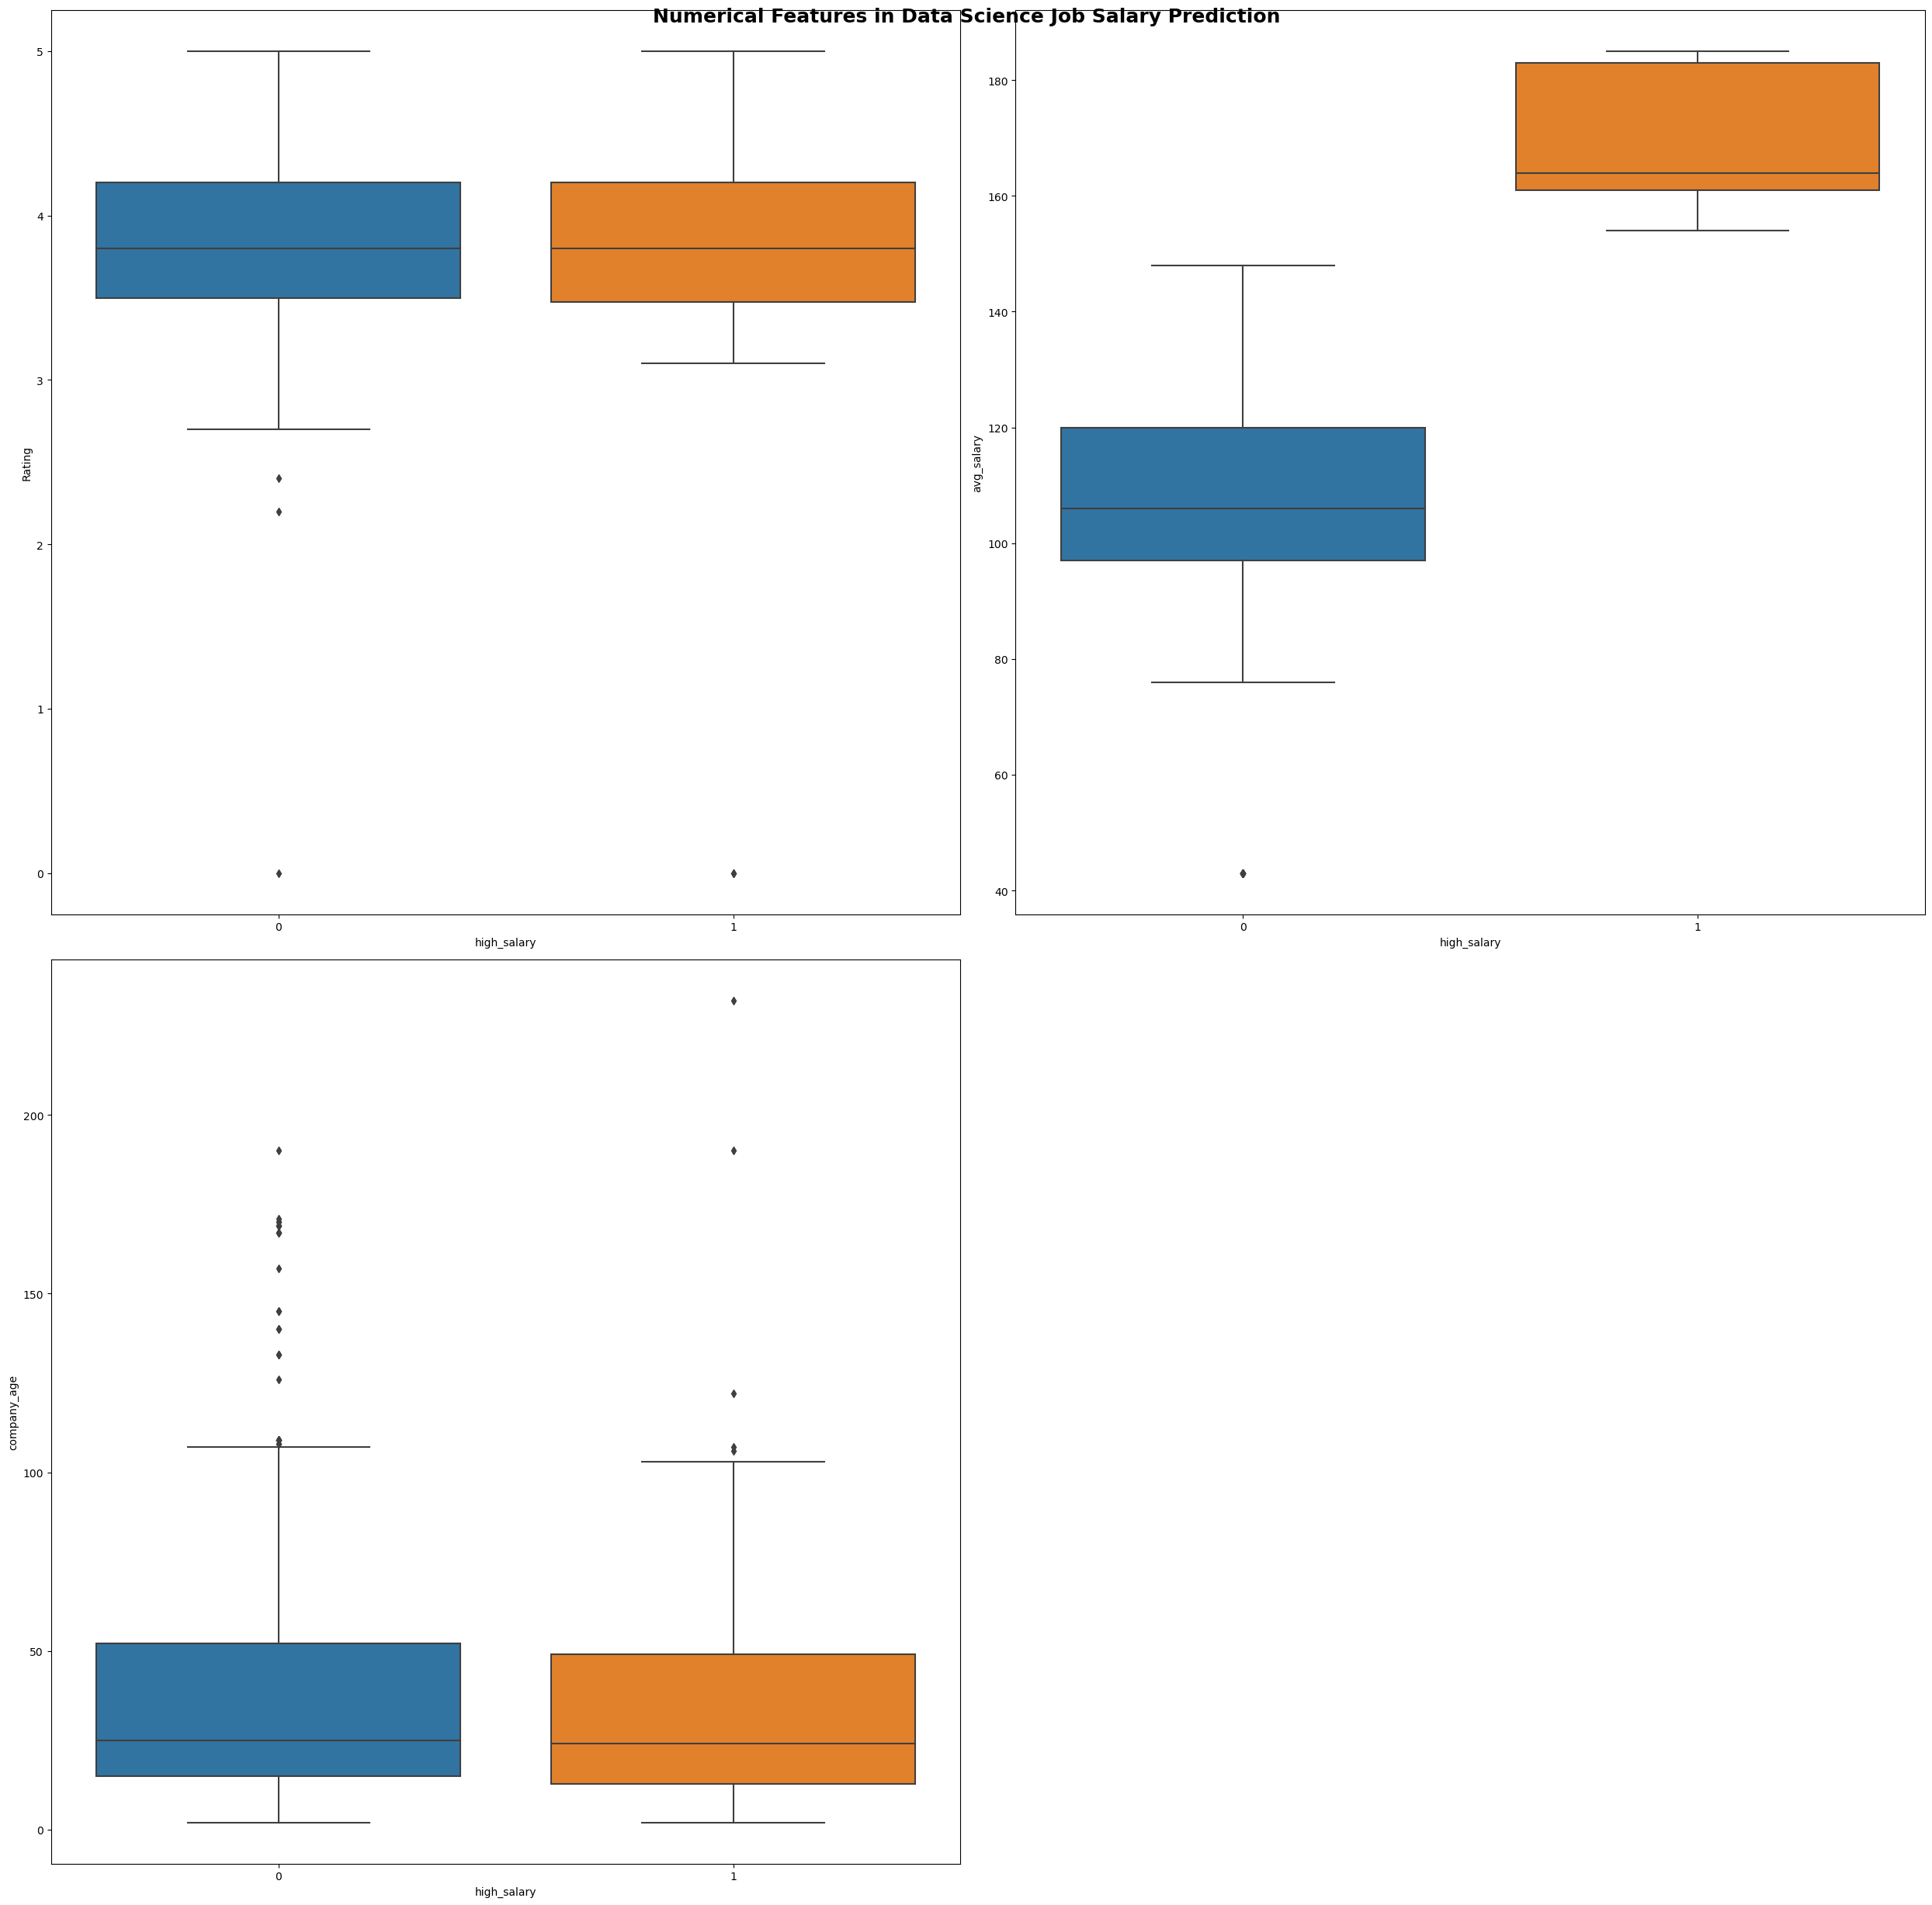

In [22]:
i = 1

plt.figure(figsize=(25,25))

for p in numerical_column:
    if 'high_salary' not in p:
        plt.subplot(2, 2, i)
        sns.boxplot(data=X, x='high_salary', y = p)
        i=i+1

plt.suptitle('Numerical Features in Data Science Job Salary Prediction', fontsize= 18, weight='bold')
plt.tight_layout()
plt.show()

1. Expectedly the avg_salary is in sync with high_salary
2. Rating and company_age box plots show a similar pattern to our first plot, where both the low and high salary range are skewed to the high rating, and both of them are skewed to the new company
3. There are many outliers for company_age data. This might happen because the high_salary attribute tends to skew to younger companies, and not many companies are older than 100.

In [23]:
Q11=df['company_age'].quantile(0.25)
Q31=df['company_age'].quantile(0.75) 
IQR1=Q31-Q11
IQR1

38.0

In [24]:
X_filter = X.loc[df['company_age'] > (Q31 + 2.5 * IQR1)]
filterx = df[df['company_age'] > (Q31 + 2.5 * IQR1)].index 
X.drop(filterx, inplace = True)

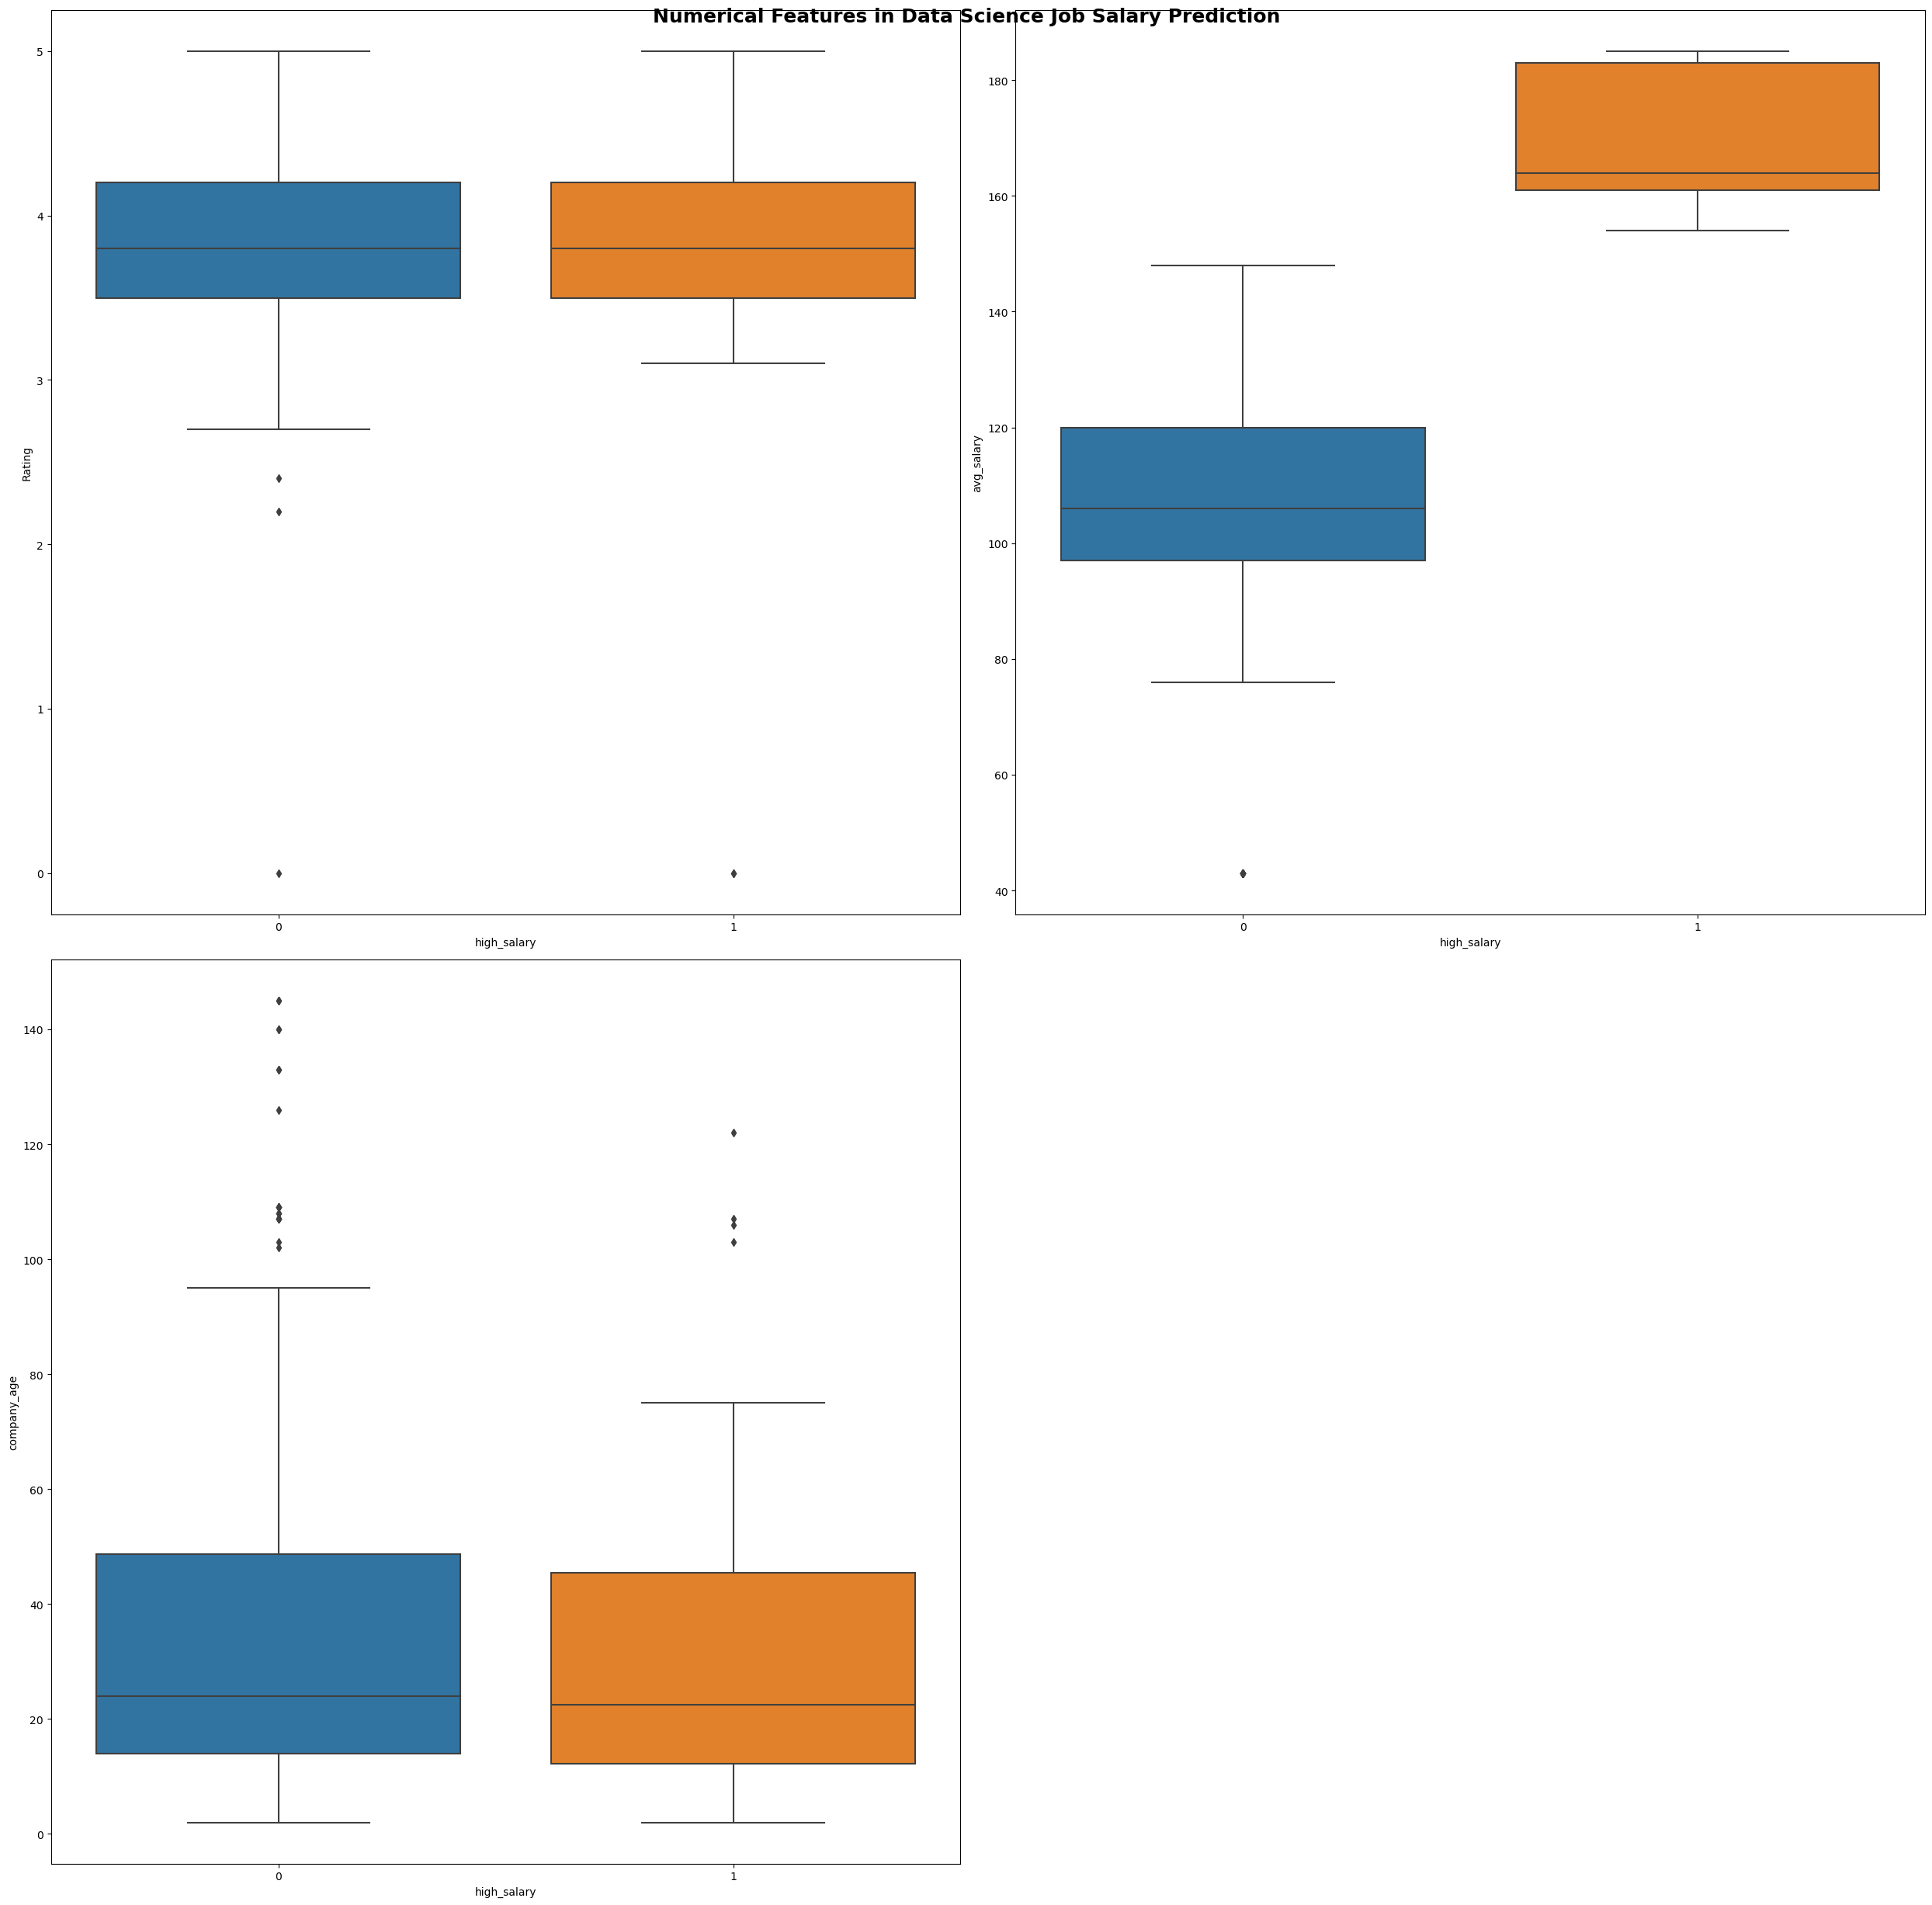

In [25]:
#after deletion of outlier
i = 1

plt.figure(figsize=(25,25))

for p in numerical_column:
    if 'high_salary' not in p:
        plt.subplot(2, 2, i)
        sns.boxplot(data=X, x='high_salary', y = p)
        i=i+1

plt.suptitle('Numerical Features in Data Science Job Salary Prediction', fontsize= 18, weight='bold')
plt.tight_layout()
plt.show()

The box plot does not affect much after we remove the outlier. The outlier does not have much impact to our data. Therefore, we will keep it.

## 3. Heatmap of Categorical Features

In [26]:
print(categorical_column)
categorical_data = df.copy()
categorical_data = categorical_data.drop(numerical_column, axis=1)
# categorical_data.head(5)

['Job Title', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'same_state', 'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data', 'job_simp', 'seniority']


Let's combine ordinal and one-hot encoding to get a better plot! 

If we filter all the categorical features to the top 10 unique values, we will get less data to make predictions (less than 100). In this case, the result might be overfitting. Therefore, we will choose features with less or equal to 10 for one-hot encoding to ensure our prediction works well later.

In [27]:
categorical_chosen = ['Size', 'Type of ownership', 'Revenue'] 
for i in categorical_chosen:
    print(categorical_data[i].unique())

['501 to 1000 employees' '5001 to 10000 employees'
 '1001 to 5000 employees' '10000+ employees' '1 to 50 employees'
 '201 to 500 employees' '51 to 200 employees']
['Company - Private' 'Company - Public' 'Private Practice / Firm'
 'Nonprofit Organization' 'Subsidiary or Business Segment' 'Government'
 'Self-employed' 'Other Organization']
['$100 to $500 million (USD)' '$2 to $5 billion (USD)'
 '$10+ billion (USD)' '$1 to $5 million (USD)'
 '$500 million to $1 billion (USD)' '$25 to $50 million (USD)'
 '$10 to $25 million (USD)' '$50 to $100 million (USD)'
 '$1 to $2 billion (USD)' '$5 to $10 million (USD)'
 'Less than $1 million (USD)' '$5 to $10 billion (USD)']


In [28]:
categorical_chosen = ['Sector', 'job_simp', 'Industry', 'Location', 'Headquarters'] 
ordinal_enc = ['Size', 'Type of ownership', 'Revenue', 'seniority']
ordinal_rank = {'Size': ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees', '1001 to 5000 employees','5001 to 10000 employees', '10000+ employees'],
                'Type of ownership': ['Self-employed', 'Private Practice / Firm', 'Other Organization', 'Nonprofit Organization', 'Subsidiary or Business Segment', 'Company - Private', 'Company - Public', 'Government'],
                'Revenue': ['Less than $1 million (USD)', '$1 to $5 million (USD)', '$5 to $10 million (USD)', '$10 to $25 million (USD)', '$25 to $50 million (USD)', '$50 to $100 million (USD)', '$100 to $500 million (USD)', '$500 million to $1 billion (USD)', '$1 to $2 billion (USD)', '$2 to $5 billion (USD)', '$5 to $10 billion (USD)', '$10+ billion (USD)'],
                'seniority': ['na', 'senior']
               }

categorical_dict = {}
categorical_name = []
for i in categorical_chosen:
    if len(categorical_data[i].unique()) <= 10: 
        categorical_dict[i] = categorical_data[i].unique()
        categorical_name.append(i)

categorical_dict

{'job_simp': array(['analyst', 'data scientist', 'mle', 'data engineer', 'director',
        'manager'], dtype=object)}

In [29]:
#Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories = list(ordinal_rank.values()))
categorical_data[ordinal_enc] = ordinal_encoder.fit_transform(categorical_data[ordinal_enc])
categorical_data.index = df.index

In [30]:
#one-hot encoding
categorical_dummies=pd.get_dummies(categorical_data, columns = categorical_dict, dtype=float) 
categorical_dummies.index = df.index
# categorical_dummies

C:\Users\Ghina Khalda S\AppData\Local\Temp\ipykernel_21480\1739705816.py:2: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  categorical_dummies=pd.get_dummies(categorical_data, columns = categorical_dict, dtype=float)


In [31]:
cat_corr = categorical_dummies.corr()

C:\Users\Ghina Khalda S\AppData\Local\Temp\ipykernel_21480\2964720649.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cat_corr = categorical_dummies.corr()


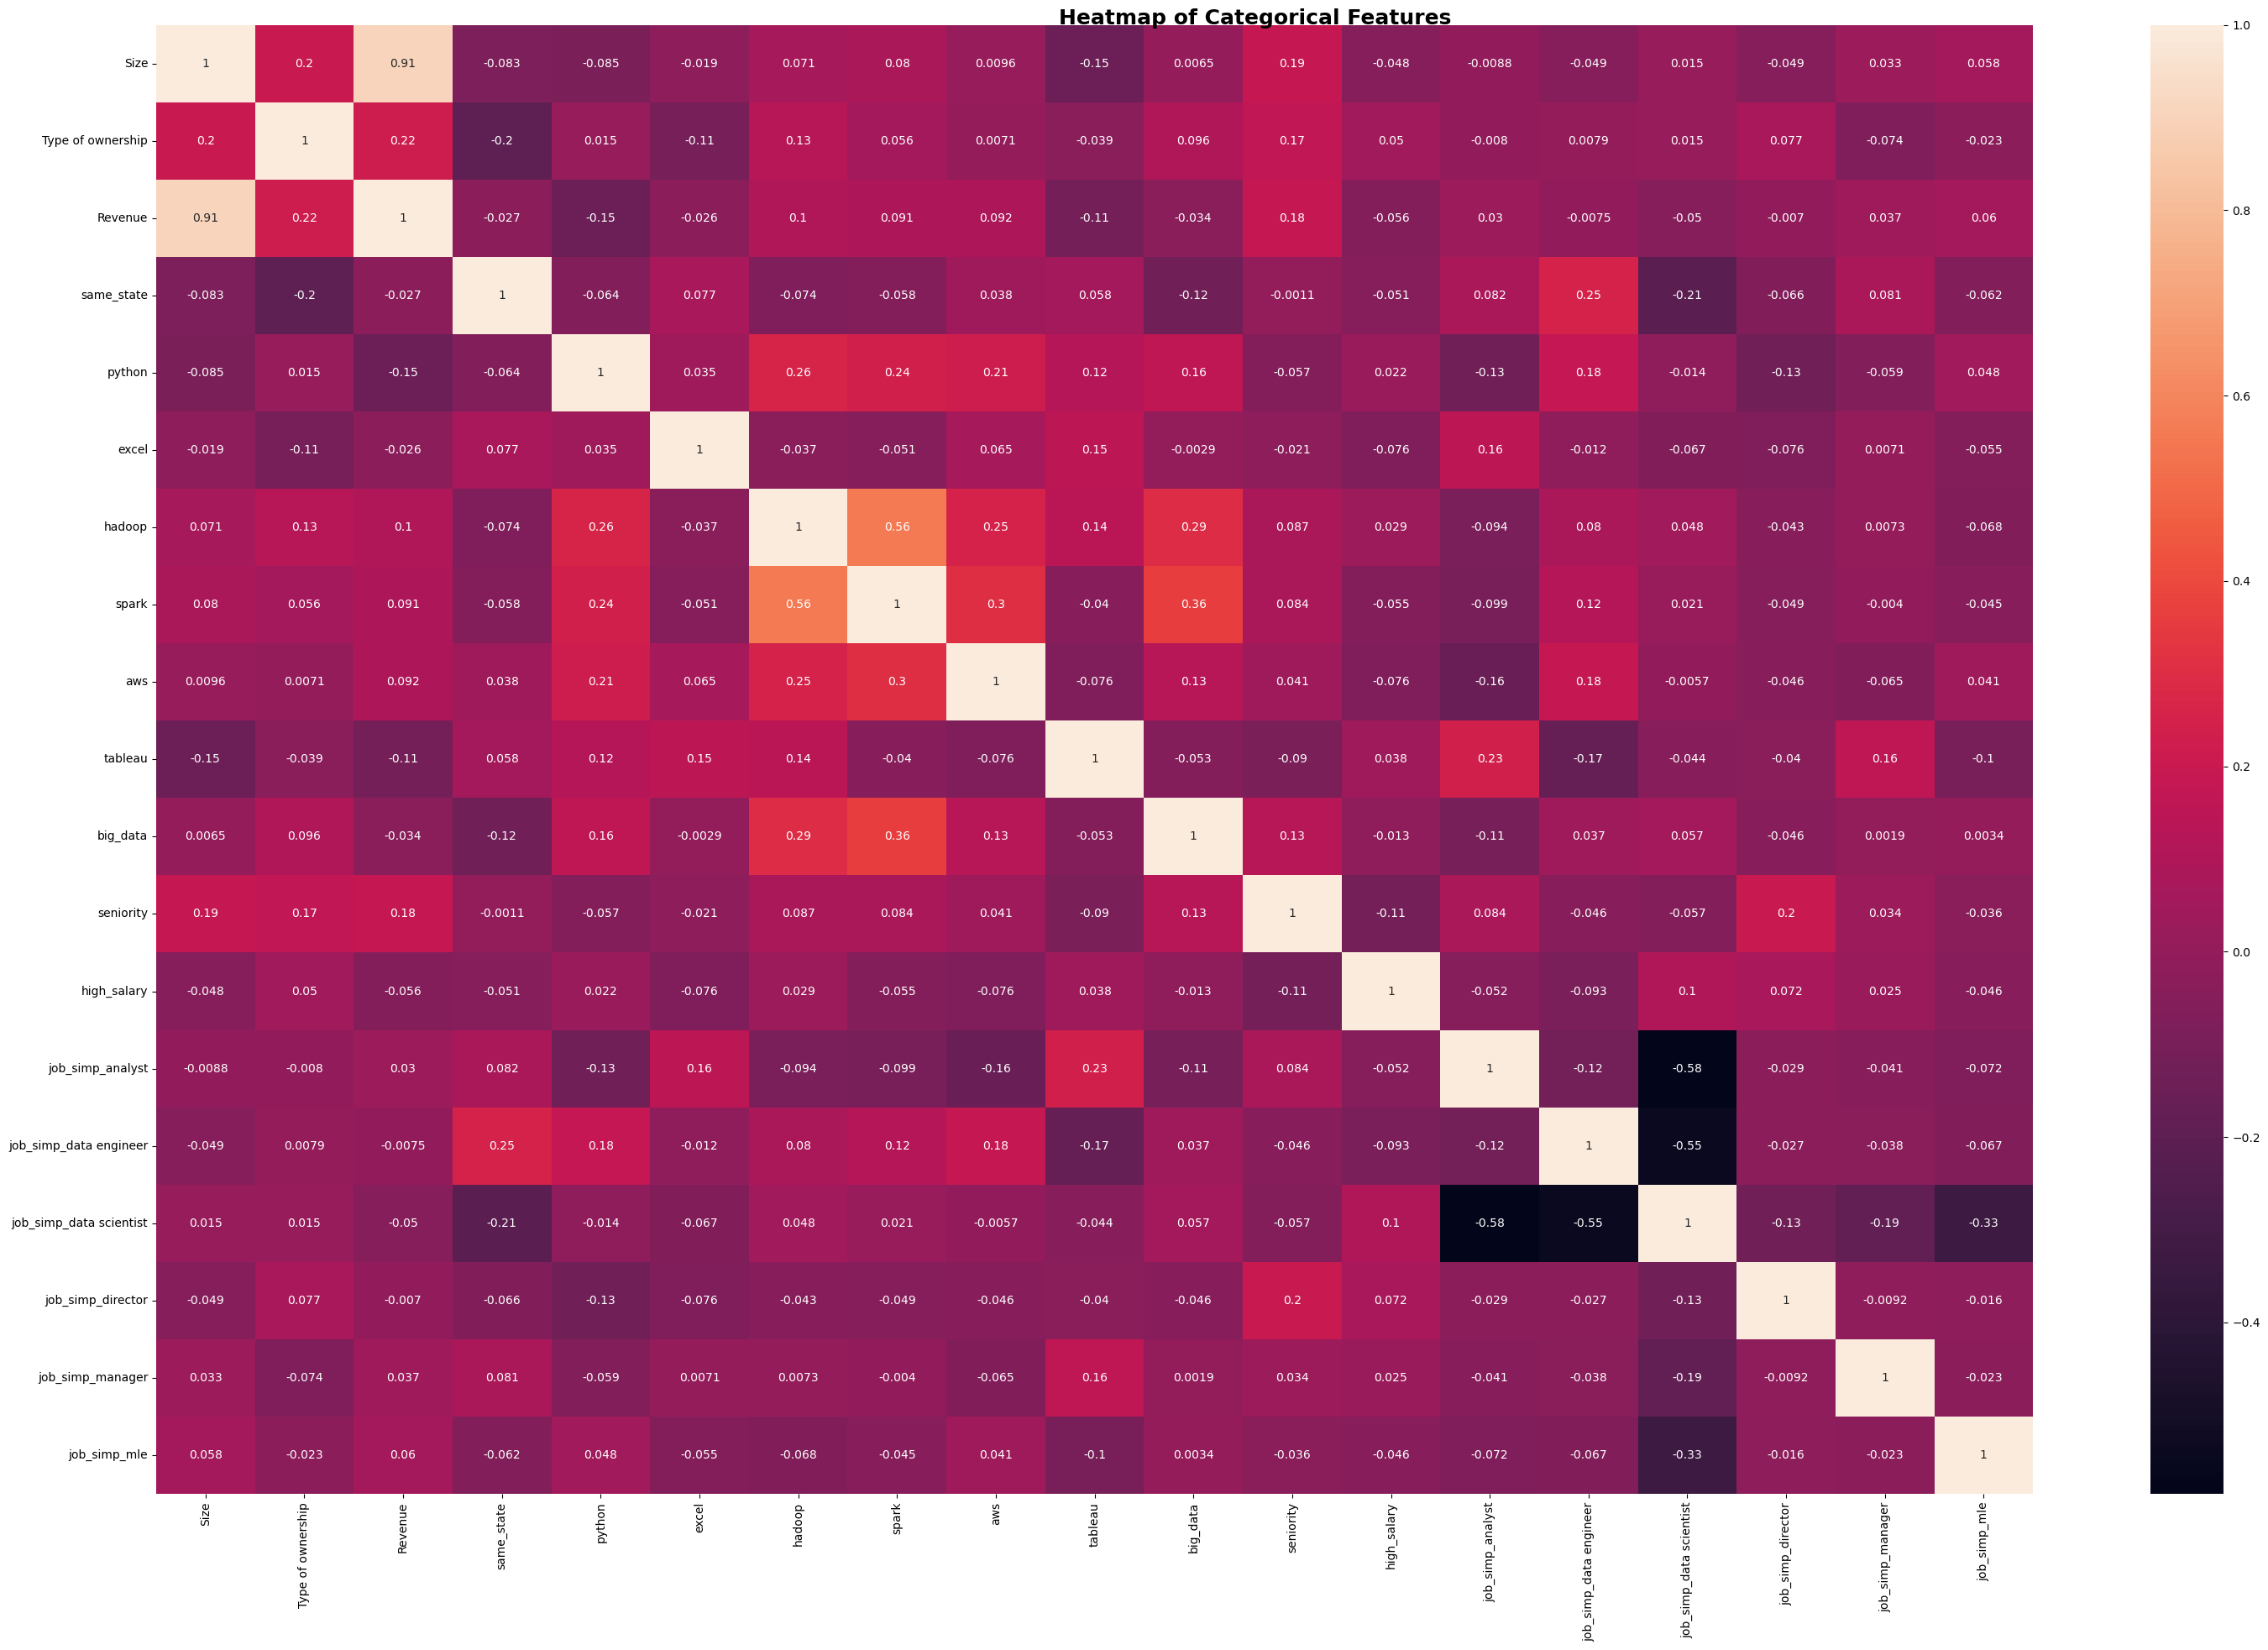

In [32]:
plt.figure(figsize=(30,20))
sns.heatmap(cat_corr, annot=True)

plt.suptitle('Heatmap of Categorical Features', fontsize= 18, weight='bold')
plt.tight_layout()
plt.show()

Heatmap for categorical data shows low correlation between any features with high_salary.

In [33]:
# i = 1

# plt.figure(figsize=(25,25))

# exclude_column_1 = ['Job Title', 'Job Description', 'Company Name', 'Location', 'Sector', 'Headquarters', 'Industry', 'job_state', 'high_salary']

# for p in categorical_dummies:
#     plt.subplot(7, 6, i)
#     if (p not in exclude_column_1 and p!='high_salary'):
#         sns.countplot(data=categorical_dummies, x=p, hue='high_salary', palette='tab10')
#         i=i+1

# plt.suptitle('Categorical Features in Data Science Job Salary Prediction', fontsize= 18, weight='bold')
# plt.tight_layout()
# plt.show()

## 4. Heatmap of Numerical Features

In [34]:
numerical_data = df.copy()
numerical_data = numerical_data.drop(categorical_column, axis=1)
num_corr = numerical_data.corr()

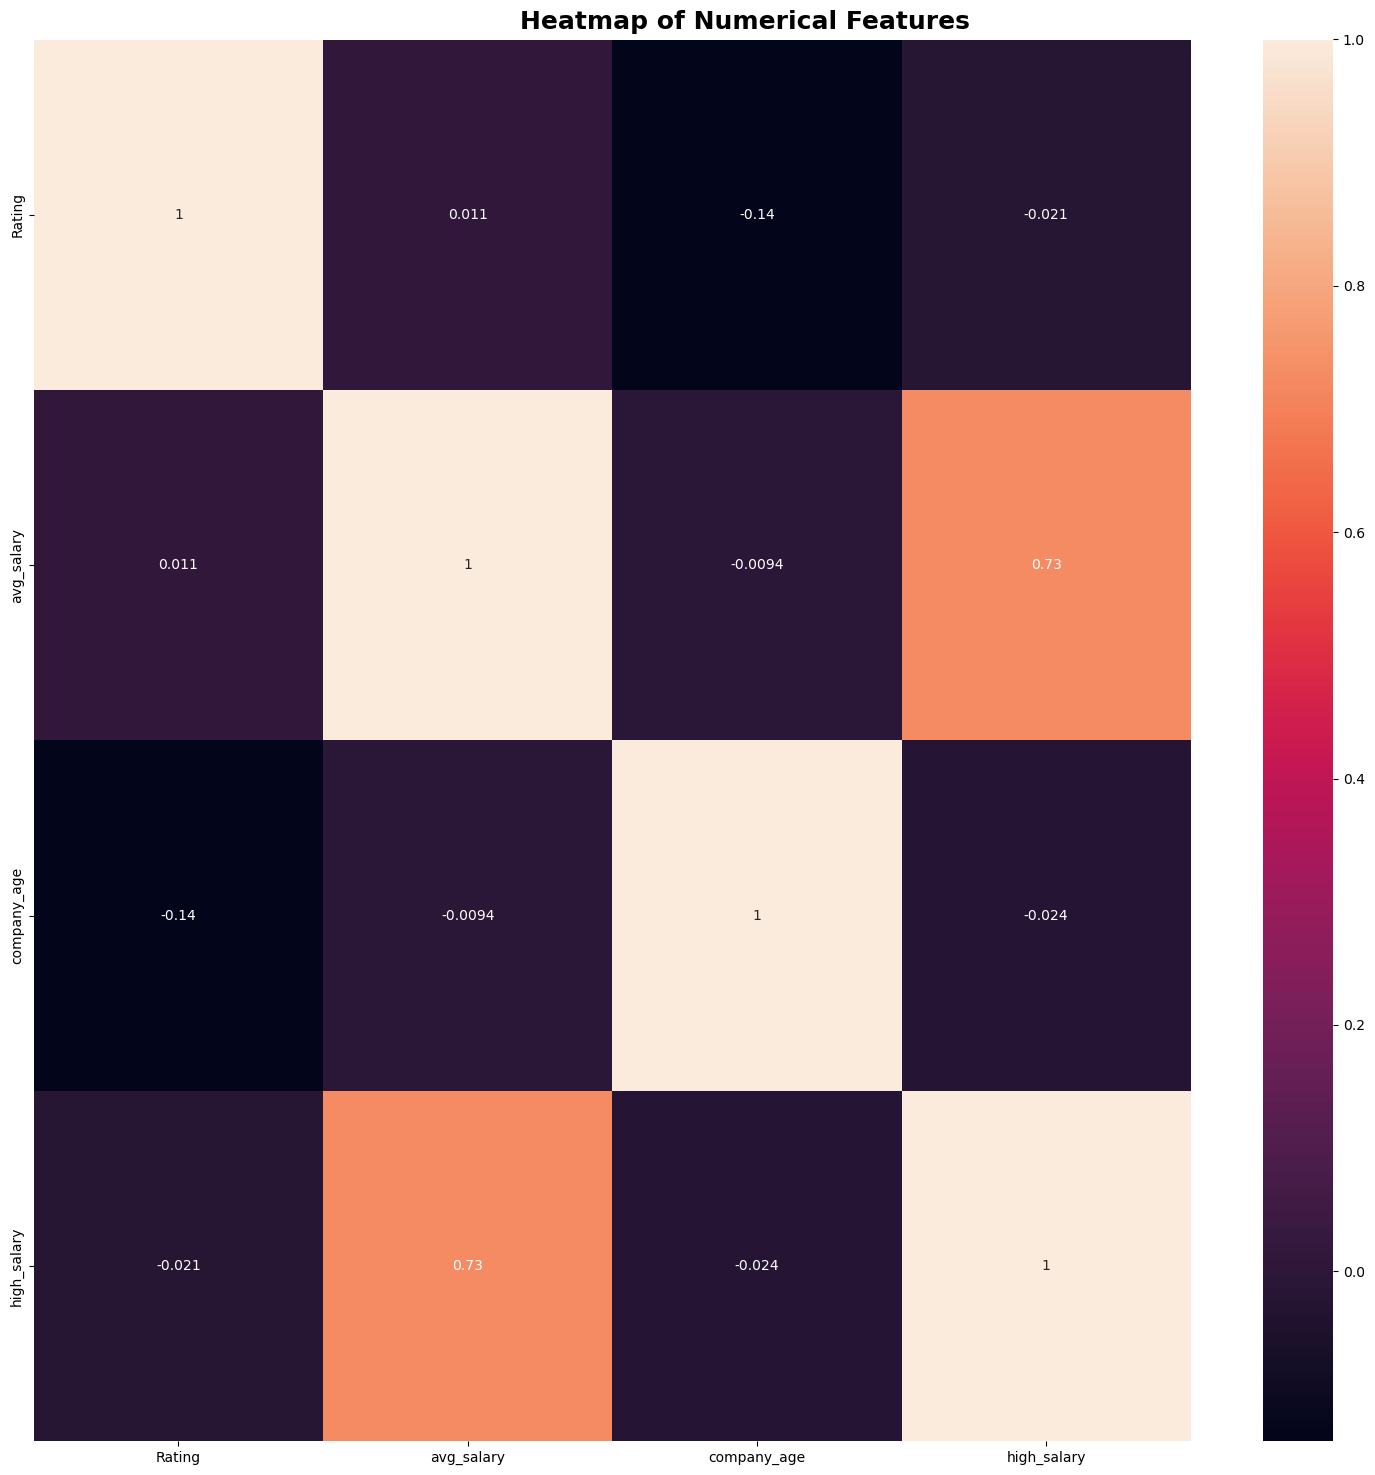

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(num_corr, annot=True)

plt.suptitle('Heatmap of Numerical Features', fontsize= 18, weight='bold')
plt.tight_layout()
plt.show()

From the heatmap, only avg_salary has a high correlation with high_salary, which happened because we created high_salary based on avg_salary. This result is similar to the heatmap for categorical data. Therefore, we will consider a more non-linear method for the next module.

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

Let's do PCA as our dimension reduction! Before that, let's update all our categorical data with one-hot and ordinal encoding (similar to what we do in module 2). Here, we will update our training and test data.

In [36]:
y_train = df.loc[:, 'high_salary']
y_test = df_test.loc[:, 'high_salary']
x_train = df
x_test = df_test

In [37]:
x_train_num = x_train.drop(categorical_column, axis = 1)
x_train = pd.concat([categorical_dummies, x_train_num], axis=1)
x_train = x_train.drop(['avg_salary', 'high_salary', 'Job Title', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Industry', 'Sector', 'job_state'], axis = 1)

In [38]:
#ordinal encoder on x_test
x_test[ordinal_enc] = ordinal_encoder.fit_transform(x_test[ordinal_enc])
x_test.index = df_test.index

#one-hot encoder on x_test
x_test=pd.get_dummies(x_test, columns = categorical_dict, dtype=float) 
x_test.index = df_test.index
x_test = x_test.drop(['avg_salary', 'index', 'Job Title', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Industry', 'Sector', 'job_state'], axis = 1)
x_test['job_simp_manager'] = '0.0'
c_order = x_train.columns
x_test1 = x_test.copy()
x_test1 = x_test1.reindex(columns=c_order)

# x_test1 = x_test1.drop(['high_salary'], axis = 1)

C:\Users\Ghina Khalda S\AppData\Local\Temp\ipykernel_21480\1269499818.py:6: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  x_test=pd.get_dummies(x_test, columns = categorical_dict, dtype=float)


Let's do scalling before do the dimension reduction step!

In [39]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(x_train)

x_trains = scale.transform(x_train)
x_tests = scale.transform(x_test1)

Let's apply PCA to achieve dimension reduction!

In [40]:
from sklearn.decomposition import PCA
model = PCA().fit(x_trains)
# print("Explained variance ratio of the first component:", model.explained_variance_ratio_[0])

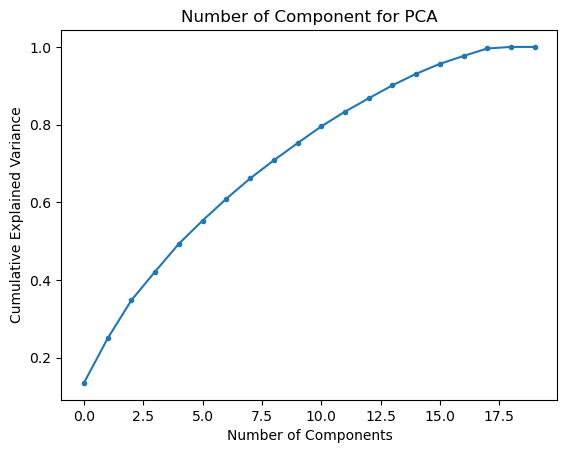

In [41]:
#choose the 0.95
plt.plot(np.cumsum(model.explained_variance_ratio_),'.-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Number of Component for PCA');

In [42]:
for i, var in enumerate(np.cumsum(model.explained_variance_ratio_)):
    if (var >= 0.9):
        print(f'n_components= {i+1}, with variance {var}')
        break

n_components= 14, with variance 0.901245241609153


In [43]:
model = PCA(n_components=14) # 2. Instantiate the model with hyperparameters
pca_x_trains = model.fit_transform(x_trains)

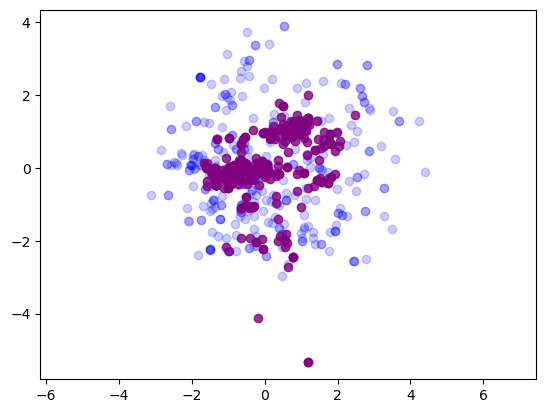

In [44]:
X_new = model.inverse_transform(pca_x_trains)
plt.scatter(pca_x_trains[:, 0], pca_x_trains[:, 1], alpha=0.2, color = 'blue')
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color = 'purple')
plt.axis('equal');

Based on the result, it shows that PCA might not able to capture meaningful improvement to our analysis. Using PCA for further analysis might be not useful. Therefore, we will not use our PCA result for our prediction.

Let's try manifold learning algorithm!

In [45]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=3, n_neighbors=10)

iso.fit(x_trains)
iso_x_trains = iso.transform(x_trains)
iso_x_trains.shape

(309, 3)

C:\Users\Ghina Khalda S\AppData\Local\Temp\ipykernel_21480\2210635993.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 2))


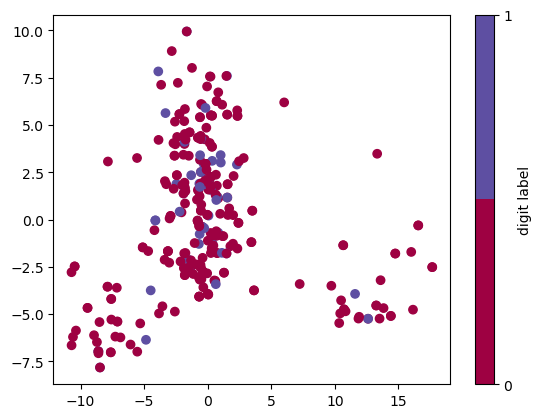

In [46]:
plt.scatter(iso_x_trains[:, 0], iso_x_trains[:, 1], c=y_train,
            cmap=plt.cm.get_cmap('Spectral', 2))
plt.colorbar(label='digit label', ticks=range(2));

Based on the graph above, the colors of the isomap are stacking each other, which might happen because the isomap cannot separate the data well. In this case, we will not use the result of dimension reduction for module 4.

### Module 4: Classification and Prediction
Choose three classification methods and build regression models based on data from `jobs_train.csv`, using five-fold cross-validation. <br>

Further, load `jobs_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the mean squared error. Which observations have the worst prediction and what are their characteristics? <br>

Note: we don't deduct points based on accuracy, as long as the models can be fitted correctly and the results are reasonable. However, if the model is wrong and does not yield meaningful and interpretable results, or if the results are interpreted incorrectly and wrong conclusions are drawn, points will be deducted.  

We will use several classification methods: **SVM Classifier, Decision Tree, and K-nearest neighbors**. We will use x_train and x_test1 data that we have processed in module 3 and x_trains and x_tests for the scale version.

In [47]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## 1. SVM Classifier

In [48]:
from sklearn.svm import SVC
svc1 = SVC(C=10.0, random_state=0)
svc2 = SVC(C=100.0, random_state=0)
svc3 = SVC(kernel='linear', C=10.0, random_state=0)
svc4 = SVC(kernel='linear', C=100.0, random_state=0)
svc5 = SVC(kernel='poly', C=10.0, random_state=0)
svc6 = SVC(kernel='poly', C=100.0, random_state=0)
svc7 = SVC(kernel='sigmoid', C=10.0, random_state=0)
svc8 = SVC(kernel='sigmoid', C=100.0, random_state=0)

In [49]:
# Perform 5-fold CV on the training data 
svc1_cv_acc = cross_val_score(svc1, x_trains, y_train, cv = 5, scoring = 'accuracy')
svc2_cv_acc = cross_val_score(svc2, x_trains, y_train, cv = 5, scoring = 'accuracy')
svc3_cv_acc = cross_val_score(svc3, x_trains, y_train, cv = 5, scoring = 'accuracy')
svc4_cv_acc = cross_val_score(svc4, x_trains, y_train, cv = 5, scoring = 'accuracy')
svc5_cv_acc = cross_val_score(svc5, x_trains, y_train, cv = 5, scoring = 'accuracy')
svc6_cv_acc = cross_val_score(svc6, x_trains, y_train, cv = 5, scoring = 'accuracy')
svc7_cv_acc = cross_val_score(svc7, x_trains, y_train, cv = 5, scoring = 'accuracy')
svc8_cv_acc = cross_val_score(svc8, x_trains, y_train, cv = 5, scoring = 'accuracy')

# Print performance metrics
print(f'Average 5 fold svc accuracy for C=10.0 is {svc1_cv_acc.mean()}')
print(f'Average 5 fold svc accuracy for C=100.0 is {svc2_cv_acc.mean()}')
print(f'Average 5 fold svc accuracy for C=10.0 and kernel = linear is {svc3_cv_acc.mean()}')
print(f'Average 5 fold svc accuracy for C=100.0 and kernel = linear is {svc4_cv_acc.mean()}')
print(f'Average 5 fold svc accuracy for C=10.0 and kernel = poly is {svc5_cv_acc.mean()}')
print(f'Average 5 fold svc accuracy for C=100.0 and kernel = poly is {svc6_cv_acc.mean()}')
print(f'Average 5 fold svc accuracy for C=10.0 and kernel = sigmoid is {svc7_cv_acc.mean()}')
print(f'Average 5 fold svc accuracy for C=100.0 and kernel = sigmoid is {svc8_cv_acc.mean()}')

Average 5 fold svc accuracy for C=10.0 is 0.8187731359069275
Average 5 fold svc accuracy for C=100.0 is 0.7573241671073507
Average 5 fold svc accuracy for C=10.0 and kernel = linear is 0.8317292437863564
Average 5 fold svc accuracy for C=100.0 and kernel = linear is 0.8317292437863564
Average 5 fold svc accuracy for C=10.0 and kernel = poly is 0.7929138022210471
Average 5 fold svc accuracy for C=100.0 and kernel = poly is 0.7411422527763087
Average 5 fold svc accuracy for C=10.0 and kernel = sigmoid is 0.7832363828662083
Average 5 fold svc accuracy for C=100.0 and kernel = sigmoid is 0.7444209413008991


Based on the average 5-fold SVC accuracy, SVC with C=10.0 and kernel = linear is the most optimal.

In [50]:
# Fit it to the entire training set
svc_final_model = SVC(kernel='linear', C=10.0, random_state=0)
svc_final_model.fit(x_trains, y_train)

# Make predictions on the training and testing data
train_preds0 = svc_final_model.predict(x_trains)
test_preds0 = svc_final_model.predict(x_tests)

# Calculate the accuracy for each
train_accuracy0 = accuracy_score(y_train, train_preds0)
test_accuracy0 = accuracy_score(y_test, test_preds0)

# Print results
print(f'The training set accuracy for our final model is {train_accuracy0}')
print(f'The test set accuracy for our final model is {test_accuracy0}')

The training set accuracy for our final model is 0.8317152103559871
The test set accuracy for our final model is 0.7974683544303798


Text(113.9222222222222, 0.5, 'True Value')

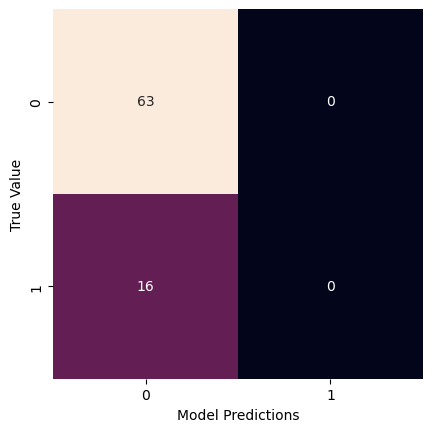

In [51]:
conf_matrix = confusion_matrix(y_test, test_preds0)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')

Here, the SVM Classifier model is not overfitting, but our model better predicts people with low salaries than high salaries.

In [52]:
#count the accuracy of our model
TP1 = 63
TN1 = 0
FP1 = 0
FN1 = 16
svm_accuracy = (TP1 + TN1) / (TP1 + TN1 + FP1 + FN1)
svm_precision = TP1 / (TP1 + FP1)
svm_recall = TP1 / (TP1 + FN1)
svm_f1 = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)

print(f'The accuracy for SVM is {svm_accuracy}')
print(f'The precision of true positives for SVM is {svm_precision}')
print(f'The recall (sensitivity) for SVM is {svm_recall}')
print(f'The F1 score for SVM is {svm_f1}')

The accuracy for SVM is 0.7974683544303798
The precision of true positives for SVM is 1.0
The recall (sensitivity) for SVM is 0.7974683544303798
The F1 score for SVM is 0.8873239436619719


## 2. Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_gini1 = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=3, random_state=0)
dt_entropy1 = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth=3, random_state=0)
dt_gini2 = DecisionTreeClassifier(criterion='gini', splitter = 'random', max_depth=3, random_state=0)
dt_entropy2 = DecisionTreeClassifier(criterion='entropy', splitter = 'random', max_depth=3, random_state=0)

In [54]:
# Perform 5-fold CV on the training data 
gini1_cv_acc = cross_val_score(dt_gini1, x_trains, y_train, cv = 5, scoring = 'accuracy')
gini2_cv_acc = cross_val_score(dt_gini2, x_trains, y_train, cv = 5, scoring = 'accuracy')
entropy1_cv_acc = cross_val_score(dt_entropy1, x_trains, y_train, cv = 5, scoring = 'accuracy')
entropy2_cv_acc = cross_val_score(dt_entropy2, x_trains, y_train, cv = 5, scoring = 'accuracy')

# Print performance metrics
print(f'Average 5 fold decision tree accuracy for criterion= gini, splitter = best is {gini1_cv_acc.mean()}')
print(f'Average 5 fold decision tree accuracy for criterion= entropy, splitter = best is {entropy1_cv_acc.mean()}')
print(f'Average 5 fold decision tree accuracy for criterion= gini, splitter = random is {gini2_cv_acc.mean()}')
print(f'Average 5 fold decision tree accuracy for criterion= entropy, splitter = random is {entropy2_cv_acc.mean()}')

Average 5 fold decision tree accuracy for criterion= gini, splitter = best is 0.8317292437863564
Average 5 fold decision tree accuracy for criterion= entropy, splitter = best is 0.8317292437863564
Average 5 fold decision tree accuracy for criterion= gini, splitter = random is 0.8285034373347436
Average 5 fold decision tree accuracy for criterion= entropy, splitter = random is 0.8285034373347436


Based on the result, as the result for criterion gini and entropy is equal, we will try to test both of them.

In [55]:
# Fit it to the entire training set
dt_final_model1 = DecisionTreeClassifier(criterion='gini', splitter = 'best', max_depth=3, random_state=0)
dt_final_model2 = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth=3, random_state=0)
dt_final_model1.fit(x_train, y_train)
dt_final_model2.fit(x_train, y_train)

# Make predictions on the training and testing data
train_preds1 = dt_final_model1.predict(x_train)
test_preds1 = dt_final_model1.predict(x_test1)

train_preds2 = dt_final_model2.predict(x_train)
test_preds2 = dt_final_model2.predict(x_test1)

# Calculate the accuracy for each
train_accuracy1 = accuracy_score(y_train, train_preds1)
test_accuracy1 = accuracy_score(y_test, test_preds1)
train_accuracy2 = accuracy_score(y_train, train_preds2)
test_accuracy2 = accuracy_score(y_test, test_preds2)

# Print results
print(f'The training set accuracy for our final model gini is {train_accuracy1}')
print(f'The test set accuracy for our final model gini is {test_accuracy1}')
print(f'The training set accuracy for our final model entropy is {train_accuracy2}')
print(f'The test set accuracy for our final model entropy is {test_accuracy2}')

The training set accuracy for our final model gini is 0.8576051779935275
The test set accuracy for our final model gini is 0.759493670886076
The training set accuracy for our final model entropy is 0.8511326860841424
The test set accuracy for our final model entropy is 0.7848101265822784


Based on the result, the decision tree with criterion = entropy has better outcomes for the final model.

Text(113.9222222222222, 0.5, 'True Value')

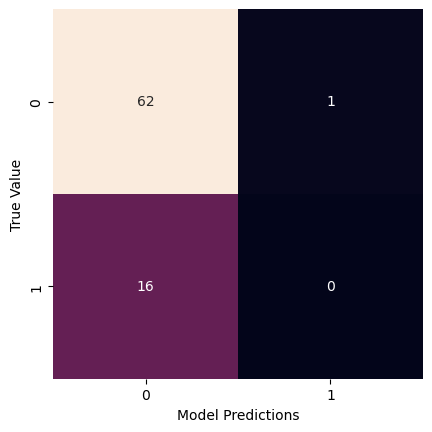

In [56]:
conf_matrix = confusion_matrix(y_test, test_preds2)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')

Here, the decision tree model is not overfitting, but our model is better at predicting people with low salaries than high salaries.

In [57]:
#count the accuracy of our model
TP2 = 62
TN2 = 1
FP2 = 0
FN2 = 16
dt_accuracy = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)
dt_precision = TP2 / (TP2 + FP2)
dt_recall = TP2 / (TP2 + FN2)
dt_f1 = 2 * (dt_precision * dt_recall) / (dt_precision + dt_recall)

print(f'The accuracy for decision tree is {dt_accuracy}')
print(f'The precision of true positives for decision tree is {dt_precision}')
print(f'The recall (sensitivity) for decision tree is {dt_recall}')
print(f'The F1 score for decision tree is {dt_f1}')

The accuracy for decision tree is 0.7974683544303798
The precision of true positives for decision tree is 1.0
The recall (sensitivity) for decision tree is 0.7948717948717948
The F1 score for decision tree is 0.8857142857142858


## 3. K-nearest neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=9)
knn4 = KNeighborsClassifier(n_neighbors=12)
knn5 = KNeighborsClassifier(n_neighbors=15)

knn1.fit(x_trains, y_train)
knn2.fit(x_trains, y_train)
knn3.fit(x_trains, y_train)
knn4.fit(x_trains, y_train)
knn5.fit(x_trains, y_train)

KNeighborsClassifier(n_neighbors=15)

In [59]:
# Perform 5-fold CV on the training data 
knn1_cv_acc = cross_val_score(knn1, x_trains, y_train, cv = 5)
knn2_cv_acc = cross_val_score(knn2, x_trains, y_train, cv = 5)
knn3_cv_acc = cross_val_score(knn3, x_trains, y_train, cv = 5)
knn4_cv_acc = cross_val_score(knn4, x_trains, y_train, cv = 5)
knn5_cv_acc = cross_val_score(knn5, x_trains, y_train, cv = 5)

# Print performance metrics
print(f'Average 5 fold KNN accuracy for n=3 is {knn1_cv_acc.mean()}')
print(f'Average 5 fold KNN accuracy for n=5 is {knn2_cv_acc.mean()}')
print(f'Average 5 fold KNN accuracy for n=9 is {knn3_cv_acc.mean()}')
print(f'Average 5 fold KNN accuracy for n=12 is {knn4_cv_acc.mean()}')
print(f'Average 5 fold KNN accuracy for n=15 is {knn5_cv_acc.mean()}')

Average 5 fold KNN accuracy for n=3 is 0.8058170280274985
Average 5 fold KNN accuracy for n=5 is 0.8316763617133791
Average 5 fold KNN accuracy for n=9 is 0.8381808566895822
Average 5 fold KNN accuracy for n=12 is 0.8350079323109465
Average 5 fold KNN accuracy for n=15 is 0.8349550502379695


Based on the average 5 fold KNN accuracy, KNN with n_neighbors=9 is the most optimal.

In [60]:
# Fit it to the entire training set
knn_final_model = KNeighborsClassifier(n_neighbors=9)
knn_final_model.fit(x_trains, y_train)

# Make predictions on the training and testing data
train_preds3 = knn_final_model.predict(x_trains)
test_preds3 = knn_final_model.predict(x_tests)

# Calculate the accuracy for each
train_accuracy3 = accuracy_score(y_train, train_preds3)
test_accuracy3 = accuracy_score(y_test, test_preds3)

# Print results
print(f'The training set accuracy for our final model is {train_accuracy3}')
print(f'The test set accuracy for our final model is {test_accuracy3}')

The training set accuracy for our final model is 0.8414239482200647
The test set accuracy for our final model is 0.7974683544303798


Text(113.9222222222222, 0.5, 'True Value')

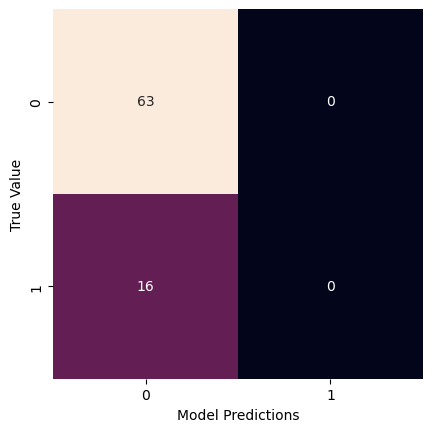

In [61]:
conf_matrix = confusion_matrix(y_test, test_preds3)
sns.heatmap(conf_matrix, square=True, annot=True, cbar=False, fmt='g')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')

Here, the KNN model is not overfitting, but our model is better at predicting people with low salaries than high salaries.

In [62]:
#count the accuracy of our model
TP3 = 63
TN3 = 0
FP3 = 0
FN3 = 16
knn_accuracy = (TP3 + TN3) / (TP3 + TN3 + FP3 + FN3)
knn_precision = TP3 / (TP3 + FP3)
knn_recall = TP3 / (TP3 + FN3)
knn_f1 = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)

print(f'The accuracy for KNN is {knn_accuracy}')
print(f'The precision of true positives for KNN is {knn_precision}')
print(f'The recall (sensitivity) for KNN is {knn_recall}')
print(f'The F1 score for KNN is {knn_f1}')

The accuracy for KNN is 0.7974683544303798
The precision of true positives for KNN is 1.0
The recall (sensitivity) for KNN is 0.7974683544303798
The F1 score for KNN is 0.8873239436619719


## The Best & Worst Observation

The three models' accuracy, precision, recall (sensitivity), and F1 score are similar. However, the sensitivity for the decision tree is slightly lower, but the F1 score is higher. Lower sensitivity means that the decision tree may have less true positive value. However, a higher F1 score means the decision tree has a good balance for precision and recall. This means that even though the decision tree loses some true positives, it also takes less false positive data.

Therefore, the decision tree is the best model. On the other hand, the SVM Classifier and K-Nearest Neighbour are the worst models, as they are more biased in filtering data as positive.

However, we should take notes at some point.
1. This project has tried on several modification data type (that is not shown in this report), where we filter categorical features to 10 unique data and when we choose categorical features with a maximum of 20 unique data. All observations fail to detect high_salary=1. This event might happen because we lack data for each individual data.
2. Generally, the data for high_salary=1 is less than high_salary=0. Therefore, all observations may lack sensitivity of high_salary=1
3. Balancing method have been tried in this project (not written in this report), but the result is overfitting/not accurate

Let's see the detail of characteristic of the worst data that cannot be detected in **SVM Classifier** and **K-Nearest Neighbour** (our observations in general)!

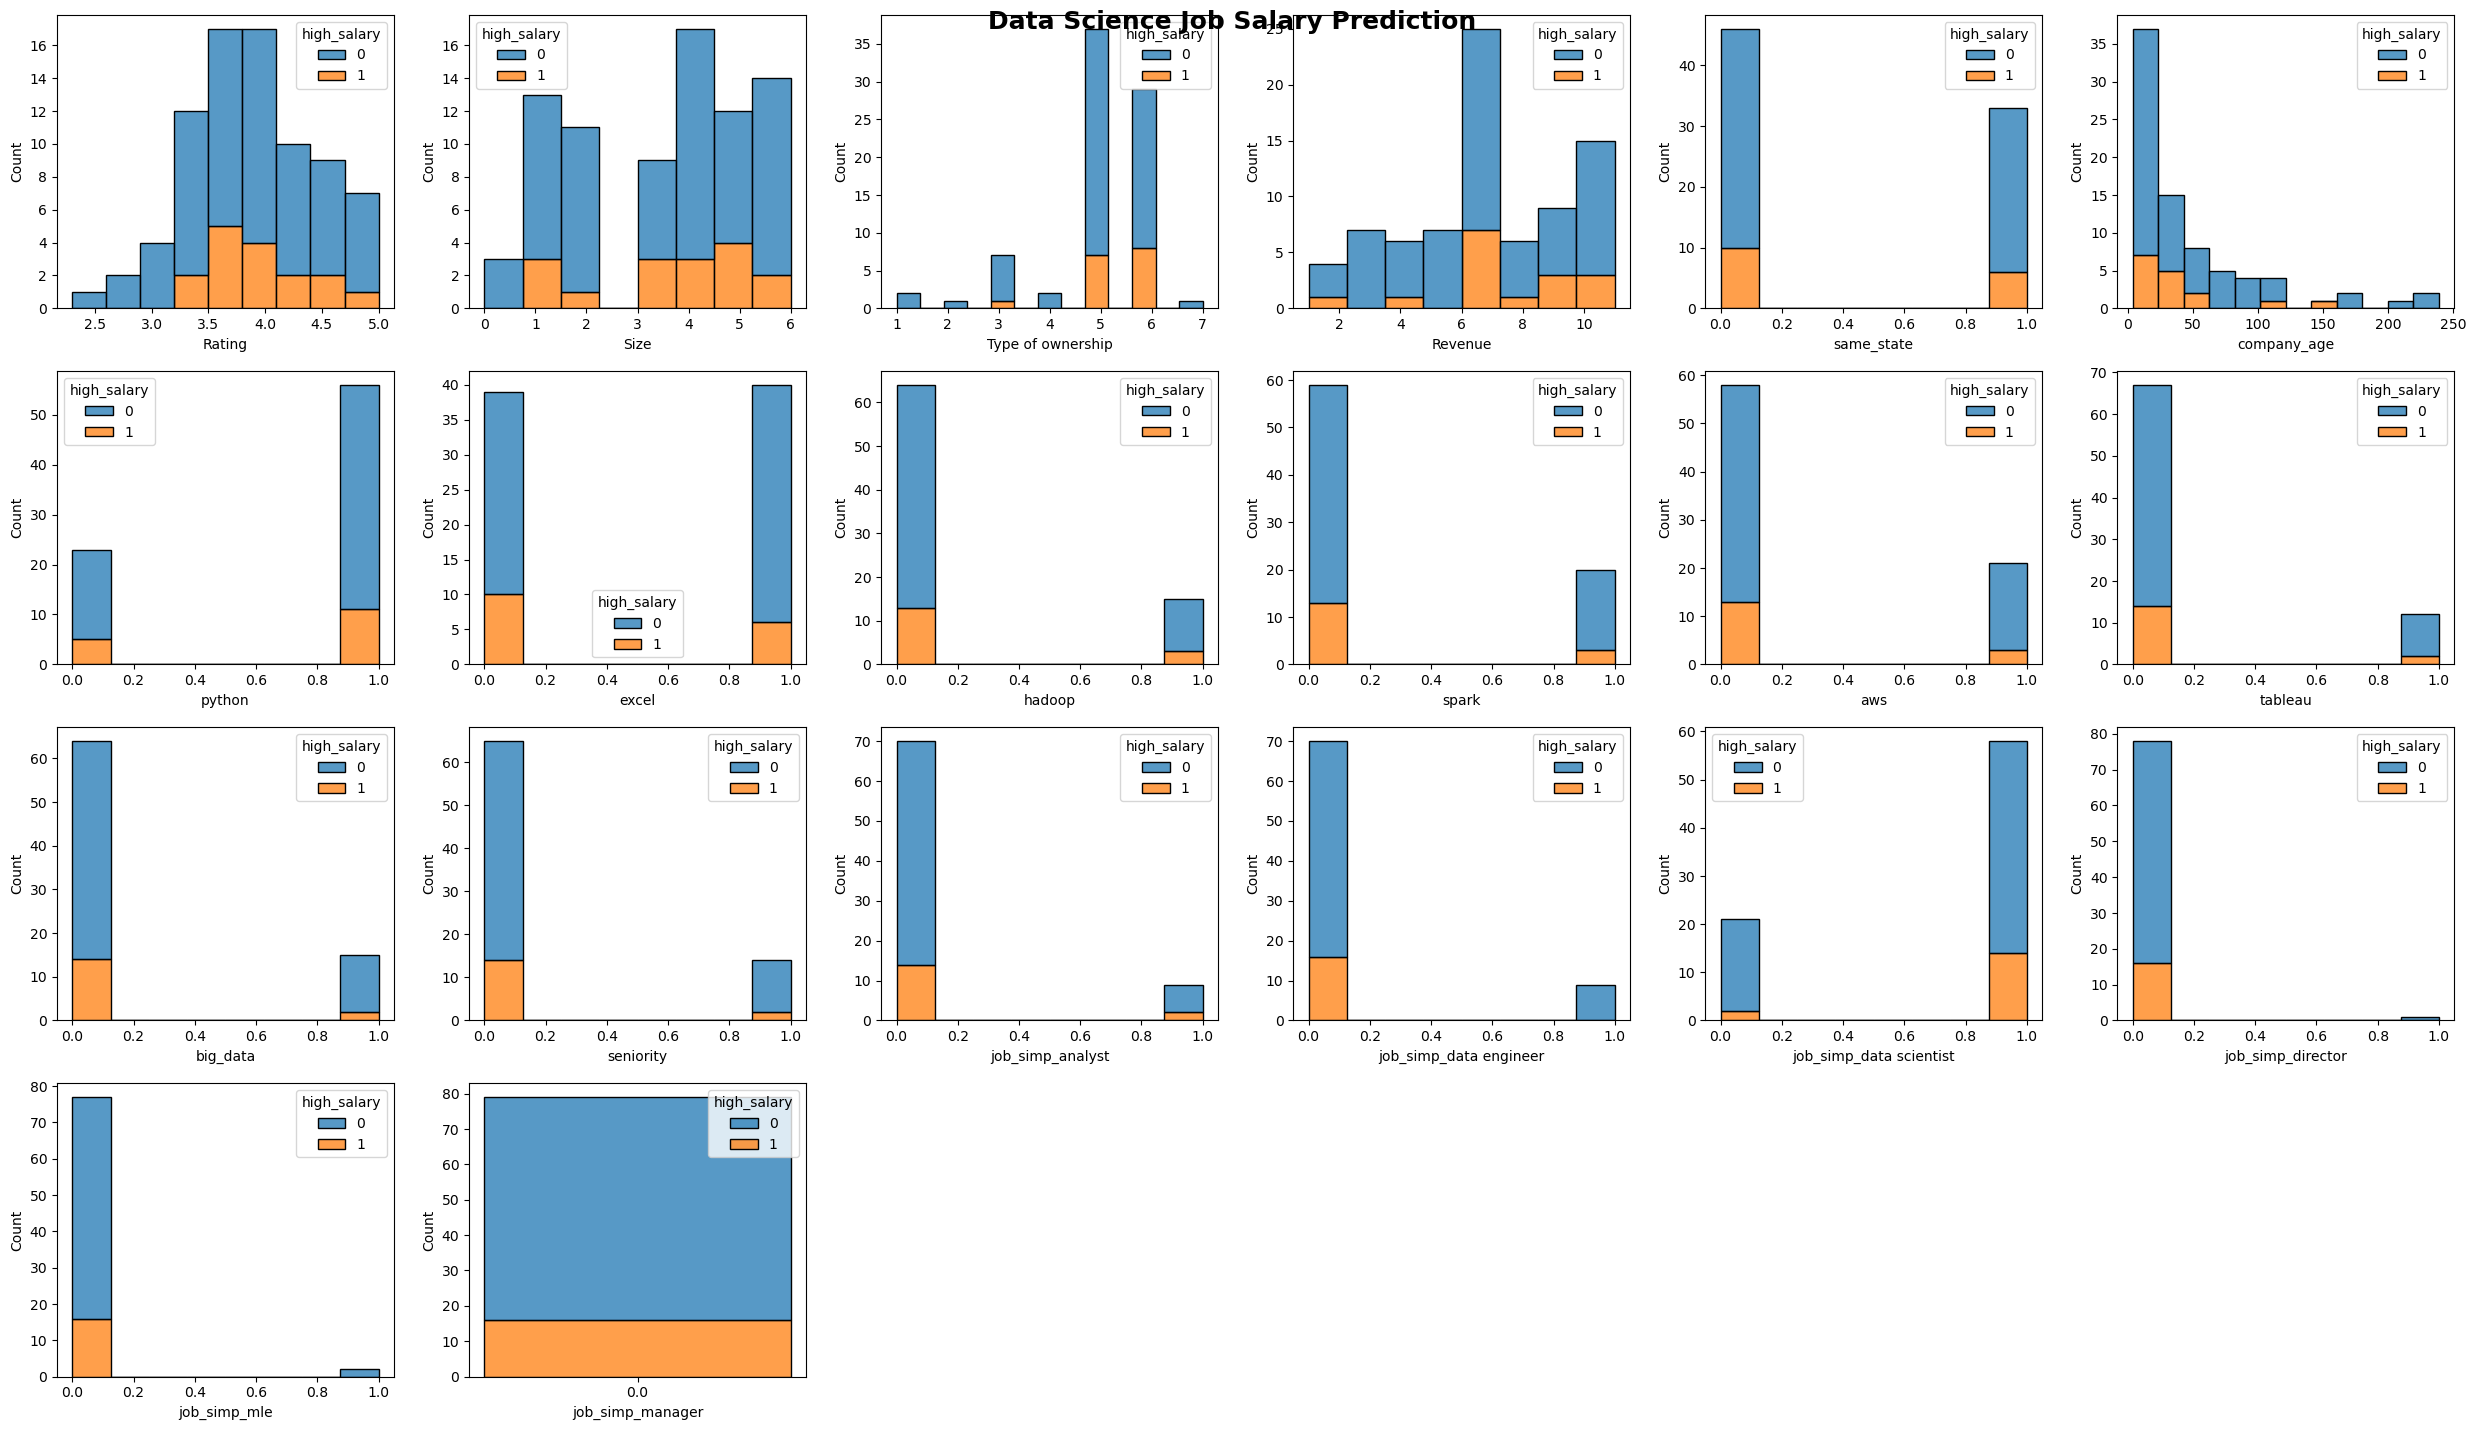

In [63]:
i = 1

plt.figure(figsize=(25,25))

for p in x_test.columns:
    plt.subplot(7, 6, i)
    if (p!='high_salary'):
        sns.histplot(data=x_test, x=p, hue='high_salary', palette='tab10', multiple='stack')
        i=i+1

plt.suptitle('Data Science Job Salary Prediction', fontsize= 18, weight='bold')
plt.tight_layout()
plt.show()

The graph above shows the data pattern between high_salary=1 (data we cannot detect) and high_salary=0. Generally, those feature charts show a similar pattern for high_salary = 1 and high_salary = 0 graphs, making it hard to predict high_salary=1. Moreover, we lack number of data for high_salary = 1 compared to high_salary=0.

# Module 5: Summary
Summarize your findings and draw conclusions. Are there any interesting patterns that you would like to highlight?

In **module 1**,  we analyzed missing values in our data and decided on the part we should drop and the amount we should do imputation. We also counted outlier values in avg_salary and dropped data included in the outlier group. After we proceeded, 211 data were removed due to missing values, ten outliers were removed from the observation, and 309 observations remained for further analysis. We also move our test data with similar logic.

In **module 2**, we plotted five graphs to help us understand the underlying patterns. Firstly, we plotted a histogram to see the pattern for each feature. After analyzing the first graph, we created a numerical box plot and heatmap for categorical and numerical data. Based on the box plot, we saw some outliers in company_age. Therefore, we checked if outliers affect our data. As removing outliers did not change much of our numerical features, we did not remove outliers. 
Then, we created the fourth and fifth heatmap graphs. For the categorical heatmap, we did encoding with features that only have less or equal to 10. Here, we found a low correlation between components and the high_salary column. Therefore, we decided to use a non-linear method for the following modules.

In **module 3**, we did dimension reduction with PCA and isomap. As PCA and isomap could not capture the pattern of our data, we chose not to use them for the classification step.

We used several classification methods in **module 4**: **SVM Classifier, Decision Tree, and K-nearest neighbors**. The result showed that the decision tree worked better than our model. However, all of our models failed to predict high_salary = 1. Moreover, balancing the data give a low accuracy on the prediction.
Based on our observations, we assumed that it might happen because we lack the data for each unique data, which made all models lack the sensitivity of high_salary=1. Additionally, based on the visualization, the data patterns for high_salary=1 and high_salary=0 are similar.